# Week 2 Submission for NBA career modelling

## Load Required Packages 

In [1]:
import os
import pandas as pd #data manipulation
import numpy as np
import sklearn # models
import seaborn as sns # visualisation
import matplotlib.pyplot as plt # visualisation
import xgboost as xgb
from xgboost import plot_importance
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
%matplotlib inline 
# visualisation inline in notebook

/Users/james/projects/adsi/adsi/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Import Data 

In [2]:
## Import Data 
data_path = '/Users/james/projects/adsi/group1_nba_career_prediction/data/raw'
train_data = data_path + '/train.csv'
test_data = data_path + '/test.csv'
df_train = pd.read_csv(train_data)
df_test = pd.read_csv(test_data)

In [3]:
## Set index for df_train
df_train = df_train.set_index('Id')

## Conduct EDA

In [4]:
## Check the type and quality of the data
df_train.info()
## Check the basic description of the data
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 10556 to 2900
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GP           8000 non-null   int64  
 1   MIN          8000 non-null   float64
 2   PTS          8000 non-null   float64
 3   FGM          8000 non-null   float64
 4   FGA          8000 non-null   float64
 5   FG%          8000 non-null   float64
 6   3P Made      8000 non-null   float64
 7   3PA          8000 non-null   float64
 8   3P%          8000 non-null   float64
 9   FTM          8000 non-null   float64
 10  FTA          8000 non-null   float64
 11  FT%          8000 non-null   float64
 12  OREB         8000 non-null   float64
 13  DREB         8000 non-null   float64
 14  REB          8000 non-null   float64
 15  AST          8000 non-null   float64
 16  STL          8000 non-null   float64
 17  BLK          8000 non-null   float64
 18  TOV          8000 non-null   float64
 19  TA

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,62.777875,18.576662,7.267088,2.807037,6.231212,44.608900,0.264525,0.816562,19.583700,1.392525,1.947788,71.365825,1.077838,2.168500,3.245300,1.624513,0.648687,0.245212,1.257763,0.833625
std,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,16.003155,0.926153,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,-38.500000,0.000000,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,8.400000,0.700000,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,19.500000,1.200000,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,30.600000,1.900000,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,82.100000,8.100000,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


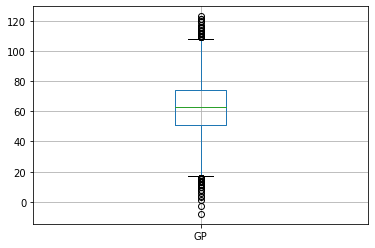

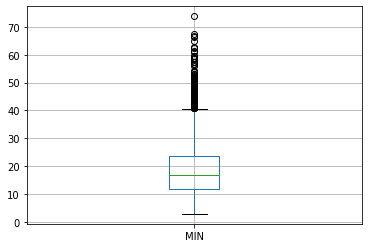

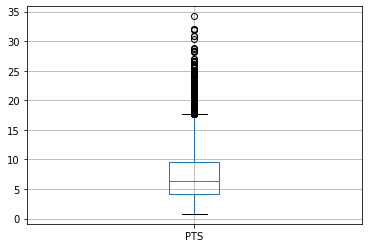

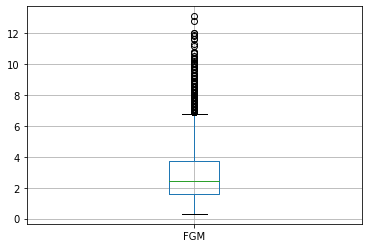

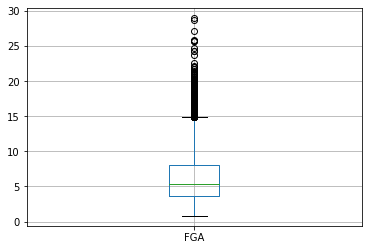

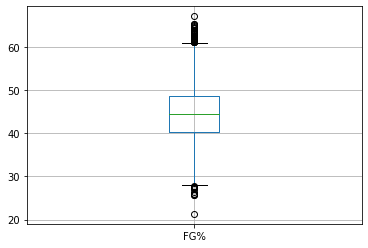

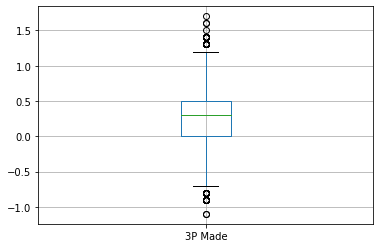

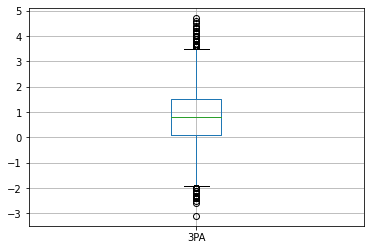

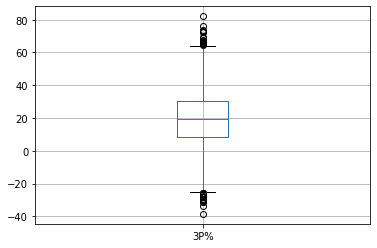

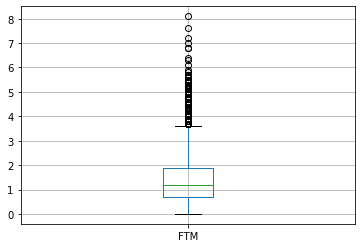

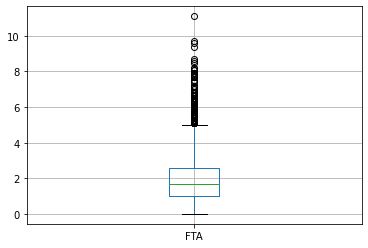

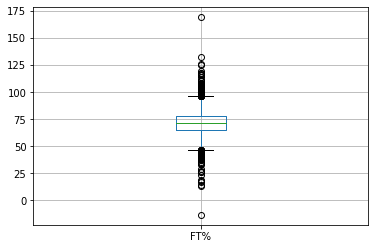

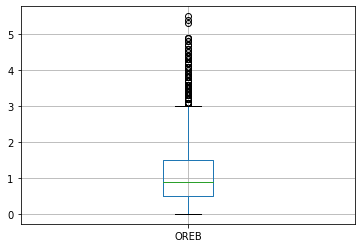

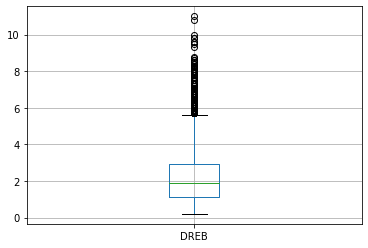

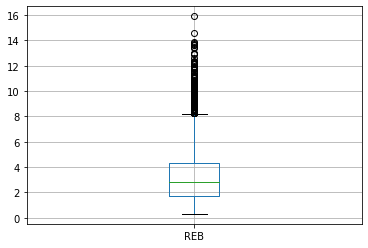

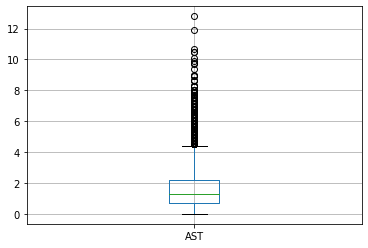

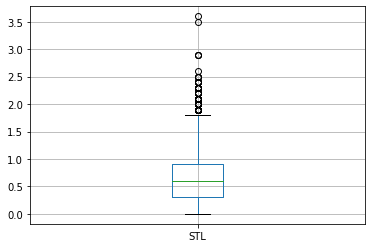

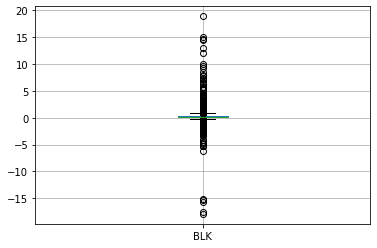

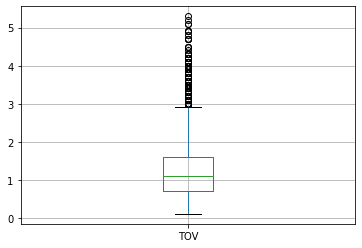

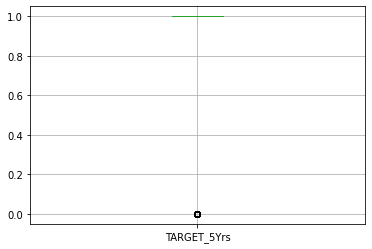

In [10]:
## Find the outlier values in the DF
for column in df_train:
    plt.figure()
    df_train.boxplot([column])

### Finding
There are several variables that have outliers

In [14]:
## There appears to be significant skewness in some of the columns - let's check for this

df_train.skew().sort_values(ascending = False)

AST            1.774748
DREB           1.388891
FTM            1.333701
REB            1.332728
OREB           1.316342
FTA            1.285804
FGM            1.285183
PTS            1.270330
FGA            1.266272
STL            1.209020
TOV            1.208849
MIN            1.100555
BLK            0.414711
FG%            0.142836
FT%            0.082300
3P%            0.038277
3PA            0.031991
3P Made        0.014764
GP            -0.019078
TARGET_5Yrs   -1.792011
dtype: float64

### Finding 
The Skewness of some variables, including the target, may result in issues with the modelling process.  

In [450]:
## Apply a cube root transformation to columns that have high skew values, this will normalise the data and handle negative values
skew = df_train[['AST', 'DREB', 'FTM', 'REB', 'OREB', 'FTA', 'FGM', 'PTS', 'FGA', 'STL', 'TOV', 'MIN']]
skew
df_train_norm = df_train.drop(skew, axis = 1)
df_train_norm #keep normallly distributed values in a separate df

,GP,FG%,3P Made,3PA,3P%,FT%,BLK,TARGET_5Yrs
Id,,,,,,,,
10556,80,45.7,0.1,0.3,22.6,72.1,0.2,1
5342,75,55.1,-0.3,-1.0,34.9,67.8,0.6,1
5716,85,42.8,0.4,1.2,34.3,75.7,0.2,1
13790,63,52.5,0.3,0.8,23.7,66.9,0.1,1
5470,63,50.8,0.5,1.4,13.7,54.0,0.6,1
...,...,...,...,...,...,...,...,...
2996,32,40.3,-0.1,-0.2,23.1,65.7,0.2,1
11679,54,48.7,0.1,0.1,3.1,70.1,0.3,1
5537,85,45.1,0.2,0.6,23.6,69.7,0.2,1


In [451]:
## Apply a cube root transformation as part of the cleaning process
df_train_skew = skew.apply(lambda x:np.cbrt(x))

In [452]:
## Check the values for skewness following transformation 
df_train_skew.skew().sort_values(ascending = False)

FGA     0.260625
FGM     0.219189
DREB    0.210976
MIN     0.209572
REB     0.204168
PTS     0.197696
TOV     0.113197
AST    -0.025501
FTA    -0.046114
FTM    -0.079961
OREB   -0.277840
STL    -0.317319
dtype: float64

In [453]:
## Combine normal and skew dfs - the df now has no skewed values in the features - The target value will be handled later using SMOTE
df_train_norm = df_train_norm.join(df_train_skew)
df_train_norm.skew()

GP            -0.019078
FG%            0.142836
3P Made        0.014764
3PA            0.031991
3P%            0.038277
FT%            0.082300
BLK            0.414711
TARGET_5Yrs   -1.792011
AST           -0.025501
DREB           0.210976
FTM           -0.079961
REB            0.204168
OREB          -0.277840
FTA           -0.046114
FGM            0.219189
PTS            0.197696
FGA            0.260625
STL           -0.317319
TOV            0.113197
MIN            0.209572
dtype: float64

/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/3501719710.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

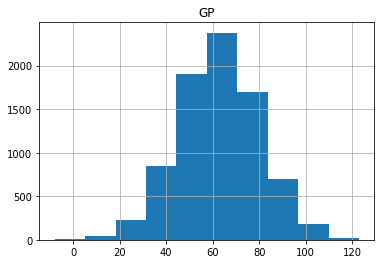

<Figure size 432x288 with 0 Axes>

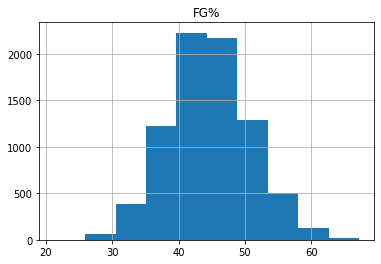

<Figure size 432x288 with 0 Axes>

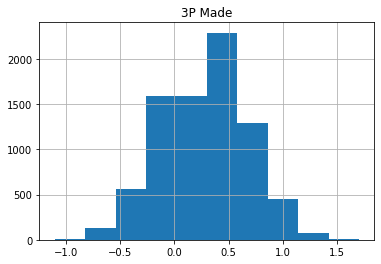

<Figure size 432x288 with 0 Axes>

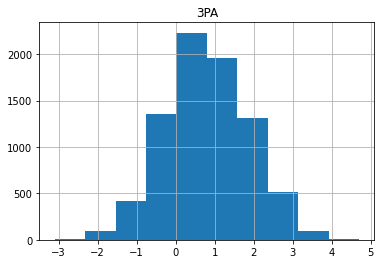

<Figure size 432x288 with 0 Axes>

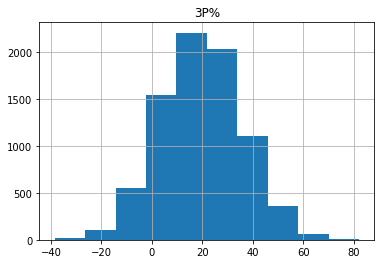

<Figure size 432x288 with 0 Axes>

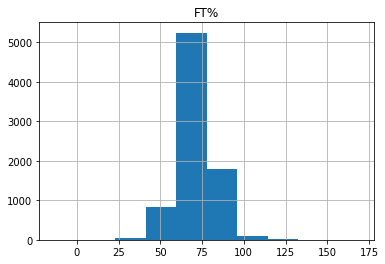

<Figure size 432x288 with 0 Axes>

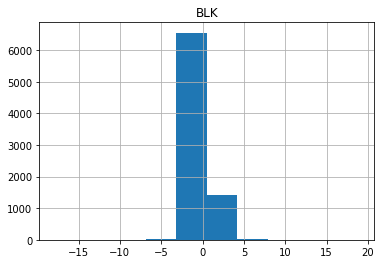

<Figure size 432x288 with 0 Axes>

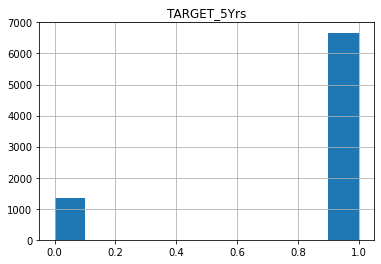

<Figure size 432x288 with 0 Axes>

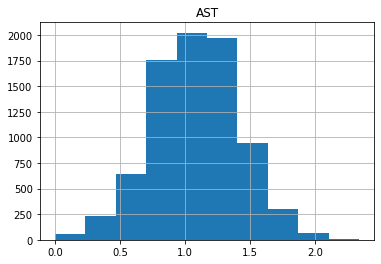

<Figure size 432x288 with 0 Axes>

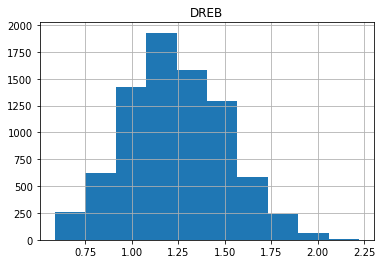

<Figure size 432x288 with 0 Axes>

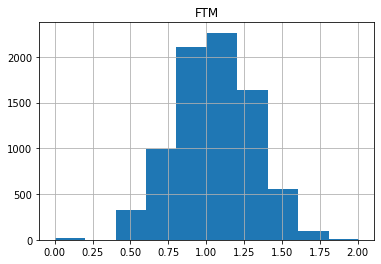

<Figure size 432x288 with 0 Axes>

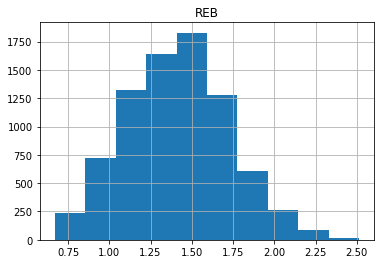

<Figure size 432x288 with 0 Axes>

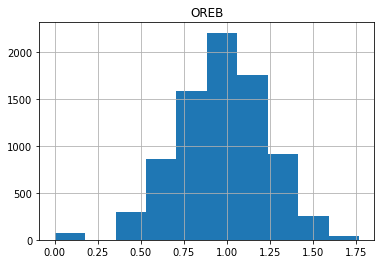

<Figure size 432x288 with 0 Axes>

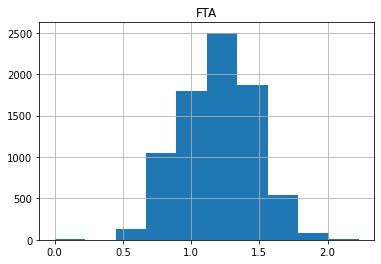

<Figure size 432x288 with 0 Axes>

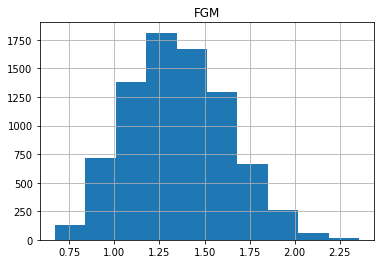

<Figure size 432x288 with 0 Axes>

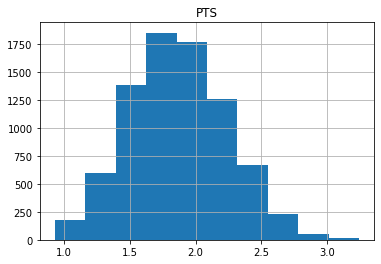

<Figure size 432x288 with 0 Axes>

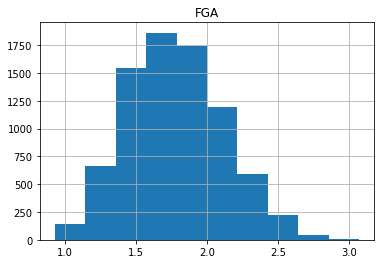

<Figure size 432x288 with 0 Axes>

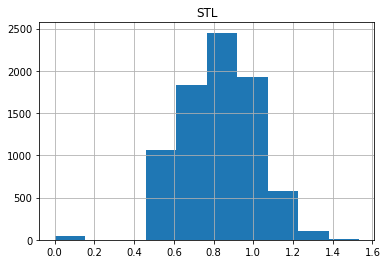

<Figure size 432x288 with 0 Axes>

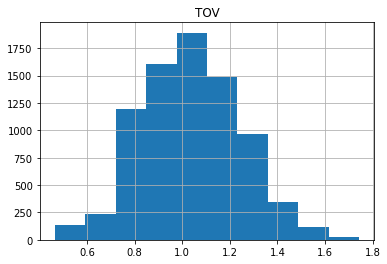

<Figure size 432x288 with 0 Axes>

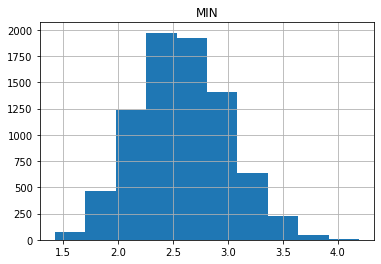

In [454]:
## Check again for skewness visually

for column in df_train_norm:
    plt.figure()
    df_train_norm.hist([column])

In [455]:
## remove outliers - this will be done using the fnecing method
from importlib import reload
import functions # import a file with custom functions in it
reload(functions)
import functions as fn

In [456]:
## Create an index to use with the identification of the outliers
df_train_norm['index'] = np.arange(len(df_train_norm))

In [457]:
## Save the original target and index as a reference
df_train_tgt_index = df_train_norm['TARGET_5Yrs']
df_train_tgt_index

,TARGET_5Yrs,index
Id,,
10556,1,0
5342,1,1
5716,1,2
13790,1,3
5470,1,4
...,...,...
2996,1,7995
11679,1,7996
5537,1,7997


In [458]:
df_train_norm.drop(['TARGET_5Yrs'], axis = 1, inplace = True)
df_train_norm

,GP,FG%,3P Made,3PA,3P%,FT%,BLK,AST,DREB,FTM,REB,OREB,FTA,FGM,PTS,FGA,STL,TOV,MIN,index
Id,,,,,,,,,,,,,,,,,,,,
10556,80,45.7,0.1,0.3,22.6,72.1,0.2,1.473613,1.259921,1.259921,1.560491,1.300591,1.426043,1.442250,1.983192,1.856636,1.032280,1.169607,2.896468,0
5342,75,55.1,-0.3,-1.0,34.9,67.8,0.6,0.887904,1.546680,1.338866,1.875777,1.532619,1.532619,1.613429,2.189760,1.991632,0.793701,1.118689,2.793522,1
5716,85,42.8,0.4,1.2,34.3,75.7,0.2,0.928318,1.216440,0.736806,1.338866,0.843433,0.843433,1.238562,1.650964,1.650964,0.736806,0.843433,2.673075,2
13790,63,52.5,0.3,0.8,23.7,66.9,0.1,1.216440,1.259921,0.965489,1.442250,0.928318,1.144714,1.518294,2.016530,1.885204,0.736806,1.238562,2.673075,3
5470,63,50.8,0.5,1.4,13.7,54.0,0.6,0.736806,1.392477,0.584804,1.698499,1.338866,0.793701,1.193483,1.546680,1.503695,0.736806,0.887904,2.610999,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,32,40.3,-0.1,-0.2,23.1,65.7,0.2,0.793701,1.216440,0.736806,1.238562,0.669433,0.843433,0.887904,1.216440,1.216440,0.669433,0.736806,2.095379,7995
11679,54,48.7,0.1,0.1,3.1,70.1,0.3,0.464159,1.032280,0.584804,1.259921,1.000000,0.736806,0.887904,1.216440,1.118689,0.000000,0.669433,1.817121,7996
5537,85,45.1,0.2,0.6,23.6,69.7,0.2,1.503695,1.280579,1.409460,1.458100,1.000000,1.574061,1.587401,2.203575,2.080084,1.062659,1.216440,3.043802,7997


In [459]:
#outlier
counter = 0
for column in df_train_norm:
    probable_outliers_tm, possible_outliers_tm, inner_fence_le, inner_fence_ue = fn.tukeys_method(df_train_norm, column)
    print("The number of probable outliers in ", column, 'are: ',len(probable_outliers_tm), '\n', probable_outliers_tm) ## only probable outliers need to be treated
    print("The number of possible outliers in ", column, 'are: ',len(possible_outliers_tm), '\n', possible_outliers_tm)
    med_column = df_train_norm[column].median()
    print("The median value is :", round(med_column, 4))
    print("The expected range is: ",inner_fence_le, " - ", inner_fence_ue)
    for i in df_train_norm['index']:
        for j in possible_outliers_tm:
            if i == j: # compare the indexes for both the original location and the IQR ranges 
                print(column, df_train_norm[column].iloc[i])
                df_train_norm[column].iloc[i] = med_column
                print(med_column)

The number of probable outliers in  GP are:  0 
 []
The number of possible outliers in  GP are:  66 
 [109, 167, 343, 380, 402, 521, 850, 858, 1318, 1351, 1382, 1953, 2221, 2265, 2404, 2541, 2700, 2763, 2833, 2987, 3047, 3093, 3285, 3344, 3363, 3812, 4105, 4154, 4429, 4483, 4566, 4574, 4598, 4617, 4948, 5008, 5216, 5323, 5428, 5500, 5526, 5657, 5749, 5844, 6033, 6391, 6404, 6450, 6455, 6501, 6585, 6689, 6959, 7125, 7157, 7298, 7400, 7457, 7602, 7631, 7667, 7671, 7747, 7838, 7847, 7871]
The median value is : 63.0
The expected range is:  16.5  -  108.5
GP 14
63.0
GP 11
63.0
GP 123
63.0
GP 111
63.0
GP 10
63.0
GP 13
63.0
GP 14
63.0
GP 13
63.0
GP 15
63.0
GP 16
63.0
GP 111
63.0
GP 16
63.0
GP 116
63.0
GP 109
63.0
GP 16
63.0
GP 11
63.0
GP 112
63.0
GP 4
63.0
GP 16
63.0
GP 116
63.0
GP 16


/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1968098555.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_norm[column].iloc[i] = med_column


63.0
GP 3
63.0
GP 15
63.0
GP 121
63.0
GP 115
63.0
GP 109
63.0
GP 11
63.0
GP 16
63.0
GP 109
63.0
GP 16
63.0
GP 16
63.0
GP 115
63.0
GP 8
63.0
GP 110
63.0
GP 110
63.0
GP 6
63.0
GP 11
63.0
GP -8
63.0
GP 12
63.0
GP 11
63.0
GP 111
63.0
GP 14
63.0
GP 113
63.0
GP 13
63.0
GP 13
63.0
GP 121
63.0
GP 117
63.0
GP 1
63.0
GP 11
63.0
GP 110
63.0
GP 120
63.0
GP 16
63.0
GP 109
63.0
GP 15
63.0
GP 16
63.0
GP 13
63.0
GP -3
63.0
GP 110
63.0
GP 114
63.0
GP 119
63.0
GP 14
63.0
GP 10
63.0
GP 112
63.0
GP 111
63.0
GP 8
63.0
GP 10
63.0
The number of probable outliers in  FG% are:  0 
 []
The number of possible outliers in  FG% are:  60 
 [370, 372, 425, 470, 613, 696, 754, 817, 920, 987, 1146, 1173, 1276, 1466, 1467, 1526, 1726, 1752, 1803, 1872, 2221, 2248, 2394, 2411, 2462, 2616, 2700, 2729, 2757, 3213, 3522, 3573, 3737, 3951, 4290, 4346, 4410, 4413, 4973, 5219, 5268, 5923, 6020, 6188, 6201, 6257, 6520, 6739, 6953, 6954, 6961, 7154, 7181, 7219, 7503, 7542, 7555, 7574, 7746, 7760]
The median value is : 44.4
The 

/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1968098555.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_norm[column].iloc[i] = med_column


44.4
FG% 27.5
44.4
FG% 61.3
44.4
FG% 27.0
44.4
FG% 27.6
44.4
FG% 63.1
44.4
FG% 27.5
44.4
FG% 61.2
44.4
FG% 65.1
44.4
FG% 63.4
44.4
FG% 27.3
44.4
FG% 63.6
44.4
FG% 62.6
44.4
FG% 61.3
44.4
FG% 61.6
44.4
FG% 61.6
44.4
FG% 21.3
44.4
FG% 25.6
44.4
FG% 62.7
44.4
FG% 63.6
44.4
FG% 25.9
44.4
FG% 61.5
44.4
FG% 62.9
44.4
FG% 63.7
44.4
FG% 63.0
44.4
FG% 61.5
44.4
FG% 62.6
44.4
FG% 25.7
44.4
FG% 61.6
44.4
FG% 64.1
44.4
FG% 67.2
44.4
FG% 26.3
44.4
FG% 64.5
44.4
FG% 26.0
44.4
FG% 62.7
44.4
FG% 63.8
44.4
FG% 61.9
44.4
FG% 61.3
44.4
FG% 62.2
44.4
FG% 61.3
44.4
FG% 61.9
44.4
FG% 27.8
44.4
FG% 61.8
44.4
FG% 64.4
44.4
FG% 27.5
44.4
FG% 62.3
44.4
FG% 65.3
44.4
FG% 61.6
44.4
FG% 27.3
44.4
FG% 61.6
44.4
FG% 61.8
44.4
FG% 64.7
44.4
FG% 61.5
44.4
FG% 62.7
44.4
FG% 65.3
44.4
The number of probable outliers in  3P Made are:  0 
 []
The number of possible outliers in  3P Made are:  74 
 [104, 217, 276, 363, 587, 612, 676, 695, 804, 824, 862, 1202, 1436, 1462, 1699, 1740, 1834, 2016, 2026, 2037, 2082, 2100, 2125,

/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1968098555.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_norm[column].iloc[i] = med_column


0.3
3P Made -0.8
0.3
3P Made 1.3
0.3
3P Made 1.3
0.3
3P Made -0.9
0.3
3P Made 1.3
0.3
3P Made 1.4
0.3
3P Made -0.9
0.3
3P Made -0.8
0.3
3P Made 1.4
0.3
3P Made -0.8
0.3
3P Made 1.3
0.3
3P Made 1.3
0.3
3P Made 1.5
0.3
3P Made 1.3
0.3
3P Made -0.9
0.3
3P Made -0.8
0.3
3P Made 1.3
0.3
3P Made -0.8
0.3
3P Made 1.3
0.3
3P Made 1.7
0.3
3P Made -0.9
0.3
3P Made -0.8
0.3
3P Made 1.3
0.3
3P Made -0.9
0.3
3P Made 1.3
0.3
3P Made -0.8
0.3
3P Made -0.8
0.3
3P Made -0.8
0.3
3P Made 1.3
0.3
3P Made -0.8
0.3
3P Made 1.3
0.3
3P Made -0.8
0.3
3P Made 1.4
0.3
3P Made 1.3
0.3
3P Made 1.3
0.3
3P Made 1.3
0.3
3P Made 1.4
0.3
3P Made 1.3
0.3
3P Made -0.9
0.3
3P Made 1.4
0.3
3P Made 1.3
0.3
3P Made 1.3
0.3
3P Made -1.1
0.3
3P Made -0.9
0.3
3P Made 1.3
0.3
3P Made -0.8
0.3
3P Made 1.4
0.3
3P Made -1.1
0.3
3P Made 1.3
0.3
3P Made -0.9
0.3
3P Made -0.9
0.3
3P Made -0.8
0.3
3P Made -0.8
0.3
3P Made 1.4
0.3
3P Made 1.6
0.3
3P Made 1.4
0.3
3P Made -0.8
0.3
The number of probable outliers in  3PA are:  0 
 []
The n

/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1968098555.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_norm[column].iloc[i] = med_column


0.8
3PA 3.7
0.8
3PA -2.3
0.8
3PA 3.6
0.8
3PA 3.8
0.8
3PA -2.4
0.8
3PA 3.6
0.8
3PA -2.2
0.8
3PA 3.7
0.8
3PA 3.9
0.8
3PA 4.3
0.8
3PA 3.6
0.8
3PA -2.0
0.8
3PA -2.1
0.8
3PA -2.0
0.8
3PA 3.6
0.8
3PA -2.0
0.8
3PA 4.7
0.8
3PA -2.3
0.8
3PA -2.4
0.8
3PA 3.9
0.8
3PA 3.7
0.8
3PA -2.4
0.8
3PA 3.7
0.8
3PA -2.0
0.8
3PA 3.6
0.8
3PA -2.1
0.8
3PA -2.0
0.8
3PA -2.0
0.8
3PA 4.2
0.8
3PA -2.4
0.8
3PA 4.1
0.8
3PA 3.7
0.8
3PA 3.6
0.8
3PA 4.0
0.8
3PA 3.8
0.8
3PA 3.6
0.8
3PA 3.8
0.8
3PA 3.8
0.8
3PA 3.6
0.8
3PA -2.5
0.8
3PA 3.6
0.8
3PA 4.5
0.8
3PA 3.7
0.8
3PA 3.6
0.8
3PA -2.6
0.8
3PA -2.4
0.8
3PA 3.6
0.8
3PA 4.0
0.8
3PA -2.0
0.8
3PA 4.3
0.8
3PA -3.1
0.8
3PA 3.8
0.8
3PA -2.4
0.8
3PA -2.3
0.8
3PA -2.4
0.8
3PA 4.1
0.8
3PA 4.6
0.8
3PA 3.6
0.8
3PA -2.3
0.8
The number of probable outliers in  3P% are:  0 
 []
The number of possible outliers in  3P% are:  37 
 [31, 54, 227, 886, 1124, 1202, 1439, 2619, 2625, 2713, 2796, 2810, 2979, 3059, 3463, 3636, 4103, 4194, 4209, 4453, 4465, 5513, 5792, 6056, 6102, 6148, 6213, 629

/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1968098555.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_norm[column].iloc[i] = med_column


19.5
3P% -28.2
19.5
3P% 72.8
19.5
3P% 65.2
19.5
3P% 67.3
19.5
3P% -26.1
19.5
3P% 76.1
19.5
3P% -29.6
19.5
3P% -25.6
19.5
3P% -25.9
19.5
3P% -27.9
19.5
3P% -30.4
19.5
3P% 73.7
19.5
3P% -33.4
19.5
3P% 67.2
19.5
3P% 82.1
19.5
3P% 67.0
19.5
3P% -28.3
19.5
3P% 65.3
19.5
3P% 64.8
19.5
The number of probable outliers in  FT% are:  21 
 [157, 227, 1164, 1300, 2202, 2772, 3059, 3286, 3621, 4005, 4094, 4096, 4228, 5425, 5433, 6177, 6741, 6762, 7003, 7221, 7821]
The number of possible outliers in  FT% are:  192 
 [19, 28, 157, 227, 311, 330, 331, 449, 470, 484, 593, 617, 622, 650, 895, 920, 982, 1099, 1150, 1164, 1226, 1227, 1244, 1265, 1296, 1297, 1300, 1347, 1398, 1416, 1439, 1446, 1518, 1522, 1527, 1618, 1634, 1660, 1735, 1763, 1819, 1832, 1850, 1897, 1957, 2019, 2032, 2076, 2080, 2089, 2114, 2159, 2202, 2318, 2320, 2341, 2395, 2411, 2421, 2536, 2588, 2609, 2719, 2752, 2772, 2785, 2876, 2892, 3046, 3054, 3059, 3066, 3072, 3093, 3116, 3158, 3178, 3192, 3193, 3199, 3219, 3239, 3286, 3452, 3459, 

/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1968098555.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_norm[column].iloc[i] = med_column


71.4
FT% 168.9
71.4
FT% 37.9
71.4
FT% 111.2
71.4
FT% 45.4
71.4
FT% 97.6
71.4
FT% 40.0
71.4
FT% 44.0
71.4
FT% 43.5
71.4
FT% 103.8
71.4
FT% 101.2
71.4
FT% 100.2
71.4
FT% 102.2
71.4
FT% 102.6
71.4
FT% 101.7
71.4
FT% 99.5
71.4
FT% 41.8
71.4
FT% 26.6
71.4
FT% 96.7
71.4
FT% 45.1
71.4
FT% 108.5
71.4
FT% 43.3
71.4
FT% 45.8
71.4
FT% 45.2
71.4
FT% 23.7
71.4
FT% 99.5
71.4
FT% 33.4
71.4
FT% 33.3
71.4
FT% 39.7
71.4
FT% 99.1
71.4
FT% 46.2
71.4
FT% 37.2
71.4
FT% 42.2
71.4
FT% 105.0
71.4
FT% 44.3
71.4
FT% 107.0
71.4
FT% 100.2
71.4
FT% 38.8
71.4
FT% 44.6
71.4
FT% 108.6
71.4
FT% 98.4
71.4
FT% 39.7
71.4
FT% 99.9
71.4
FT% 100.7
71.4
FT% 38.6
71.4
FT% 98.1
71.4
FT% 39.5
71.4
FT% 106.7
71.4
FT% 97.0
71.4
FT% 104.0
71.4
FT% 13.5
71.4
FT% 39.6
71.4
FT% 45.2
71.4
FT% 45.4
71.4
FT% 45.9
71.4
FT% 41.8
71.4
FT% 103.3
71.4
FT% 97.5
71.4
FT% 46.2
71.4
FT% 102.0
71.4
FT% 99.6
71.4
FT% 98.5
71.4
FT% 25.9
71.4
FT% 107.2
71.4
FT% 41.2
71.4
FT% 45.7
71.4
FT% 42.3
71.4
FT% 33.3
71.4
FT% -13.3
71.4
FT% 42.3
71.4
FT% 100.2

/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1968098555.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_norm[column].iloc[i] = med_column


0.2
BLK 2.2
0.2
BLK 1.0
0.2
BLK -0.7
0.2
BLK -1.7
0.2
BLK 1.4
0.2
BLK 0.9
0.2
BLK 1.5
0.2
BLK -0.7
0.2
BLK -0.5
0.2
BLK 1.1
0.2
BLK 0.9
0.2
BLK 1.9
0.2
BLK -0.8
0.2
BLK -2.0
0.2
BLK -0.4
0.2
BLK 1.1
0.2
BLK -1.0
0.2
BLK 0.9
0.2
BLK 0.9
0.2
BLK -0.4
0.2
BLK 1.2
0.2
BLK -0.6
0.2
BLK 0.9
0.2
BLK -1.0
0.2
BLK -0.5
0.2
BLK -0.4
0.2
BLK -1.0
0.2
BLK 1.3
0.2
BLK 1.6
0.2
BLK 1.5
0.2
BLK 1.3
0.2
BLK -0.4
0.2
BLK -0.5
0.2
BLK -0.5
0.2
BLK -0.9
0.2
BLK 1.0
0.2
BLK -2.0
0.2
BLK 2.0
0.2
BLK -0.5
0.2
BLK 2.1
0.2
BLK -0.4
0.2
BLK 1.1
0.2
BLK -0.4
0.2
BLK -2.2
0.2
BLK -0.5
0.2
BLK 1.7
0.2
BLK -0.7
0.2
BLK 12.1
0.2
BLK -1.0
0.2
BLK 2.9
0.2
BLK 1.4
0.2
BLK 1.6
0.2
BLK -1.2
0.2
BLK -1.7
0.2
BLK -1.6
0.2
BLK -1.5
0.2
BLK 1.4
0.2
BLK 1.8
0.2
BLK -5.2
0.2
BLK -1.3
0.2
BLK 1.6
0.2
BLK -15.2
0.2
BLK -0.9
0.2
BLK -0.5
0.2
BLK -1.8
0.2
BLK 1.0
0.2
BLK 1.2
0.2
BLK 1.8
0.2
BLK -0.7
0.2
BLK 1.0
0.2
BLK 1.0
0.2
BLK -0.6
0.2
BLK 1.2
0.2
BLK -0.4
0.2
BLK 1.0
0.2
BLK 1.5
0.2
BLK -0.4
0.2
BLK 1.2
0.2
BLK 1.1
0.2
BLK 0.

0.2
BLK 4.7
0.2
BLK -0.8
0.2
BLK -1.0
0.2
BLK -0.6
0.2
BLK -0.4
0.2
BLK -3.4
0.2
BLK 1.2
0.2
BLK 1.1
0.2
BLK -0.5
0.2
BLK -0.6
0.2
BLK 1.5
0.2
BLK 1.3
0.2
BLK 2.9
0.2
BLK 0.9
0.2
BLK -0.7
0.2
BLK 1.1
0.2
BLK -0.5
0.2
BLK 1.0
0.2
BLK 1.0
0.2
BLK -1.5
0.2
BLK 1.1
0.2
BLK 1.1
0.2
BLK 1.0
0.2
BLK 2.1
0.2
BLK -0.7
0.2
BLK -5.3
0.2
BLK -0.5
0.2
BLK -0.7
0.2
BLK -0.6
0.2
BLK -0.8
0.2
BLK 1.2
0.2
BLK 1.1
0.2
BLK 0.9
0.2
BLK -1.2
0.2
BLK 3.8
0.2
BLK -0.5
0.2
BLK 1.1
0.2
BLK 1.6
0.2
BLK 1.1
0.2
BLK -1.1
0.2
BLK 3.4
0.2
BLK 1.0
0.2
BLK 1.4
0.2
BLK -0.4
0.2
BLK 0.9
0.2
BLK 1.0
0.2
BLK 1.0
0.2
BLK 1.0
0.2
BLK 1.3
0.2
BLK 0.9
0.2
BLK 2.6
0.2
BLK -0.4
0.2
BLK 1.0
0.2
BLK -0.7
0.2
BLK -0.8
0.2
BLK 1.0
0.2
BLK 1.3
0.2
BLK -0.4
0.2
BLK -0.4
0.2
BLK 1.1
0.2
BLK -0.4
0.2
BLK 1.1
0.2
BLK -1.0
0.2
BLK 5.7
0.2
BLK -0.7
0.2
BLK -1.1
0.2
BLK 1.9
0.2
BLK 1.4
0.2
BLK -0.6
0.2
BLK 1.1
0.2
BLK -3.2
0.2
BLK -1.4
0.2
BLK -0.6
0.2
BLK 1.2
0.2
The number of probable outliers in  AST are:  0 
 []
The number of possible

/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1968098555.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_norm[column].iloc[i] = med_column


1.091392883061106
AST 1.9309787692112597
1.091392883061106
AST 0.0
1.091392883061106
AST 1.966095144983117
1.091392883061106
AST 0.0
1.091392883061106
AST 0.0
1.091392883061106
AST 0.0
1.091392883061106
AST 0.0
1.091392883061106
AST 0.0
1.091392883061106
AST 0.0
1.091392883061106
AST 0.0
1.091392883061106
AST 0.0
1.091392883061106
AST 0.0
1.091392883061106
AST 1.966095144983117
1.091392883061106
AST 2.139974961130159
1.091392883061106
AST 2.0246938520054574
1.091392883061106
AST 0.0
1.091392883061106
AST 0.0
1.091392883061106
AST 0.0
1.091392883061106
AST 2.0246938520054574
1.091392883061106
AST 2.2035754532216254
1.091392883061106
AST 1.9309787692112597
1.091392883061106
AST 1.9219973427746713
1.091392883061106
AST 1.9746808222123668
1.091392883061106
AST 1.9916317012899132
1.091392883061106
AST 0.0
1.091392883061106
AST 0.0
1.091392883061106
AST 1.9574338205844317
1.091392883061106
AST 0.0
1.091392883061106
AST 0.0
1.091392883061106
AST 2.0567101162059633
1.091392883061106
AST 2.0246

/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1968098555.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_norm[column].iloc[i] = med_column
/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1968098555.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_norm[column].iloc[i] = med_column


1.2385623296301709
DREB 2.1253171383652223
1.2385623296301709
DREB 2.139974961130159
1.2385623296301709
DREB 2.0246938520054574
1.2385623296301709
DREB 2.0487996145182663
1.2385623296301709
DREB 2.0246938520054574
1.2385623296301709
DREB 2.0487996145182663
1.2385623296301709
DREB 2.139974961130159
1.2385623296301709
DREB 2.1253171383652223
1.2385623296301709
The number of probable outliers in  FTM are:  0 
 []
The number of possible outliers in  FTM are:  35 
 [109, 564, 646, 805, 1012, 1022, 1222, 1274, 1317, 2051, 2283, 2785, 2961, 3289, 3344, 3523, 3570, 3812, 3833, 4188, 5054, 5118, 5439, 5639, 5822, 5876, 6196, 6281, 6391, 6484, 6604, 6689, 7029, 7159, 7271]
The median value is : 1.0627
The expected range is:  0.3619165099112456  -  1.764549821461526
FTM 0.0
1.0626585691826111
FTM 1.8271601368635206
1.0626585691826111
FTM 0.0
1.0626585691826111
FTM 1.7967017791430526
1.0626585691826111
FTM 0.0
1.0626585691826111
FTM 0.0
1.0626585691826111
FTM 0.0
1.0626585691826111
FTM 0.0
1.06265

/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1968098555.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_norm[column].iloc[i] = med_column


1.4094597464129783
REB 2.5145814537998397
1.4094597464129783
REB 2.295770424665555
1.4094597464129783
REB 2.4043901127973535
1.4094597464129783
REB 2.3452900988768355
1.4094597464129783
REB 2.381101577952299
1.4094597464129783
REB 2.308350239753609
1.4094597464129783
REB 2.308350239753609
1.4094597464129783
REB 2.3513346877207577
1.4094597464129783
REB 2.308350239753609
1.4094597464129783
REB 2.398610306579842
1.4094597464129783
REB 2.4440923888454056
1.4094597464129783
REB 2.3269667714505617
1.4094597464129783
REB 2.302077517963147
1.4094597464129783
REB 2.2894284851066637
1.4094597464129783
REB 2.3452900988768355
1.4094597464129783
REB 2.308350239753609
1.4094597464129783
REB 2.375207738061588
1.4094597464129783
REB 2.295770424665555
1.4094597464129783
REB 2.386966383854674
1.4094597464129783
REB 2.386966383854674
1.4094597464129783
REB 2.295770424665555
1.4094597464129783
REB 2.3928025107131377
1.4094597464129783
REB 2.295770424665555
1.4094597464129783
REB 2.314589054525876
1.40945

/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1968098555.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_norm[column].iloc[i] = med_column


0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 1.6750686836022342
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 1.6984992522418108
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 1.6984992522418108
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9

/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1968098555.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_norm[column].iloc[i] = med_column


1.193483191927337
FTA 0.0
1.193483191927337
FTA 1.9486951603746578
1.193483191927337
FTA 1.9831924826807747
1.193483191927337
FTA 2.0165296752181043
1.193483191927337
FTA 1.9746808222123668
1.193483191927337
FTA 0.0
1.193483191927337
FTA 1.9746808222123668
1.193483191927337
FTA 1.9746808222123668
1.193483191927337
FTA 1.9574338205844317
1.193483191927337
The number of probable outliers in  FGM are:  0 
 []
The number of possible outliers in  FGM are:  34 
 [180, 564, 645, 1382, 1680, 2221, 2283, 2770, 2785, 2885, 3164, 3289, 3332, 3344, 3363, 3524, 3921, 4421, 4429, 5081, 5118, 5193, 5443, 6035, 6044, 6187, 6281, 6391, 6711, 6959, 7148, 7220, 7421, 7591]
The median value is : 1.3389
The expected range is:  0.6039971775548132  -  2.1122902915023687
FGM 2.1253171383652223
1.338865900164339
FGM 2.182785766122212
1.338865900164339
FGM 2.132671235505887
1.338865900164339
FGM 2.154434690031884
1.338865900164339
FGM 2.276638114962505
1.338865900164339
FGM 2.182785766122212
1.338865900164339
F

/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1968098555.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_norm[column].iloc[i] = med_column


1.338865900164339
FGM 2.339214190570293
1.338865900164339
FGM 2.1897595699439445
1.338865900164339
FGM 2.2373778841627936
1.338865900164339
FGM 2.2035754532216254
1.338865900164339
FGM 2.139974961130159
1.338865900164339
FGM 2.161592332945083
1.338865900164339
FGM 2.283051213952527
1.338865900164339
FGM 2.2894284851066637
1.338865900164339
FGM 2.132671235505887
1.338865900164339
FGM 2.161592332945083
1.338865900164339
FGM 2.161592332945083
1.338865900164339
FGM 2.1757671139171206
1.338865900164339
FGM 2.132671235505887
1.338865900164339
FGM 2.3573483576137275
1.338865900164339
FGM 2.139974961130159
1.338865900164339
FGM 2.2440170265918304
1.338865900164339
FGM 2.2637023919259014
1.338865900164339
FGM 2.1472291690189413
1.338865900164339
FGM 2.2637023919259014
1.338865900164339
FGM 2.139974961130159
1.338865900164339
The number of probable outliers in  PTS are:  0 
 []
The number of possible outliers in  PTS are:  33 
 [564, 645, 1382, 1680, 1959, 2221, 2283, 2770, 2785, 2885, 3164, 328

/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1968098555.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_norm[column].iloc[i] = med_column


1.8469147504478334
PTS 2.9851114174570075
1.8469147504478334
PTS 3.1346104144813403
1.8469147504478334
PTS 3.0473954294010075
1.8469147504478334
PTS 2.996291714390912
1.8469147504478334
PTS 2.970072817692642
1.8469147504478334
PTS 2.904392866781852
1.8469147504478334
PTS 3.061685886613654
1.8469147504478334
PTS 3.171491567537526
1.8469147504478334
PTS 3.174802103936399
1.8469147504478334
PTS 2.8964681538168895
1.8469147504478334
PTS 2.908339057595449
1.8469147504478334
PTS 3.0
1.8469147504478334
PTS 2.9624960684073707
1.8469147504478334
PTS 2.939530058935875
1.8469147504478334
PTS 2.9851114174570075
1.8469147504478334
PTS 2.9851114174570075
1.8469147504478334
PTS 3.178105750548842
1.8469147504478334
PTS 3.117555613369834
1.8469147504478334
PTS 2.920113838058922
1.8469147504478334
PTS 2.9548803636849534
1.8469147504478334
PTS 2.9548803636849534
1.8469147504478334
PTS 2.9586931167705806
1.8469147504478334
PTS 3.245951566569593
1.8469147504478334
PTS 2.900435923371512
1.8469147504478334
P

/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1968098555.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_norm[column].iloc[i] = med_column


1.7544106429277198
FGA 2.7589241763811208
1.7544106429277198
The number of probable outliers in  STL are:  0 
 []
The number of possible outliers in  STL are:  47 
 [109, 167, 409, 656, 1161, 1222, 1289, 1351, 1353, 1435, 1478, 1664, 1819, 1852, 2555, 2612, 3066, 3285, 3363, 3739, 3813, 3833, 3845, 4483, 4563, 4582, 4776, 4907, 4966, 5518, 5520, 5590, 5893, 5896, 6180, 6263, 6689, 6708, 6765, 7148, 7317, 7388, 7421, 7625, 7788, 7902, 7996]
The median value is : 0.8434
The expected range is:  0.22534829829697905  -  1.4095740363908202
STL 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
STL 1.4260431471424087
0.8434326653017492
STL 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
STL 0.0
0.843

/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1968098555.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_norm[column].iloc[i] = med_column


 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
STL 1.4260431471424087
0.8434326653017492
STL 0.0
0.8434326653017492
STL 1.5326188647871062
0.8434326653017492
STL 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
STL 1.4260431471424087
0.8434326653017492
STL 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
STL 0.0
0.8434326653017492
The number of probable outliers in  TOV are:  0 
 []
The number of possible outliers in  TOV are:  57 
 [109, 283, 380, 646, 794, 805, 991, 1012, 1115, 1353, 1680, 1959, 2031, 2304, 2492, 2763, 2770, 2961, 3289, 3344, 3376, 3464, 3474, 3503, 3570, 3601, 3734, 3833, 3845, 4061, 4154, 4428, 5054, 5118, 5193, 53

/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1968098555.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_norm[column].iloc[i] = med_column


1.0322801154563672
TOV 0.4641588833612779
1.0322801154563672
TOV 1.6261333316791686
1.0322801154563672
TOV 0.4641588833612779
1.0322801154563672
TOV 1.6261333316791686
1.0322801154563672
TOV 1.6005206638831553
1.0322801154563672
TOV 0.4641588833612779
1.0322801154563672
TOV 0.4641588833612779
1.0322801154563672
TOV 1.6134286460245437
1.0322801154563672
TOV 0.4641588833612779
1.0322801154563672
TOV 1.6509636244473134
1.0322801154563672
TOV 1.721300620726316
1.0322801154563672
TOV 1.6261333316791686
1.0322801154563672
TOV 0.4641588833612779
1.0322801154563672
TOV 1.6005206638831553
1.0322801154563672
TOV 0.4641588833612779
1.0322801154563672
TOV 1.6984992522418108
1.0322801154563672
TOV 0.4641588833612779
1.0322801154563672
TOV 1.7435134012651283
1.0322801154563672
TOV 1.6984992522418108
1.0322801154563672
TOV 1.6868653306034984
1.0322801154563672
TOV 1.6386425412012917
1.0322801154563672
TOV 0.4641588833612779
1.0322801154563672
TOV 0.4641588833612779
1.0322801154563672
TOV 1.6005206638

/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1968098555.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_norm[column].iloc[i] = med_column


2.5611583299749885
MIN 3.8258623655447783
2.5611583299749885
MIN 3.734902260070083
2.5611583299749885
MIN 3.9663849653615495
2.5611583299749885
MIN 4.047353857509058
2.5611583299749885
MIN 3.9706180368402557
2.5611583299749885
MIN 3.859721314680821
2.5611583299749885
The number of probable outliers in  index are:  0 
 []
The number of possible outliers in  index are:  0 
 []
The median value is : 3999.5
The expected range is:  -3999.5  -  11998.5


In [460]:
df_train_norm.median()

GP           63.000000
FG%          44.400000
3P Made       0.300000
3PA           0.800000
3P%          19.500000
FT%          71.400000
BLK           0.200000
AST           1.091393
DREB          1.238562
FTM           1.062659
REB           1.409460
OREB          0.965489
FTA           1.193483
FGM           1.338866
PTS           1.846915
FGA           1.754411
STL           0.843433
TOV           1.032280
MIN           2.561158
index      3999.500000
dtype: float64

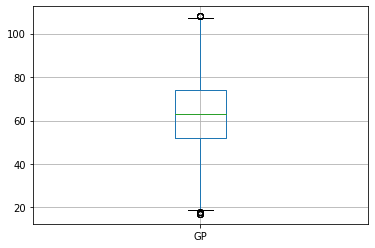

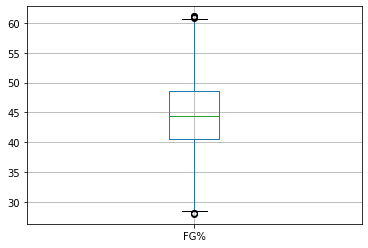

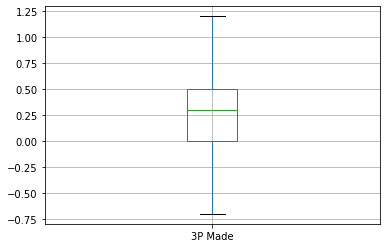

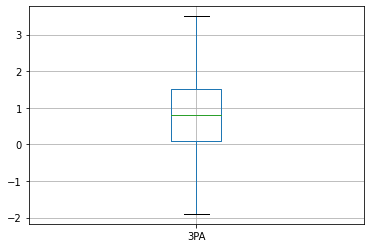

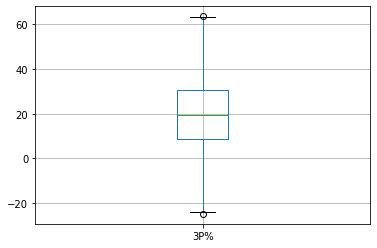

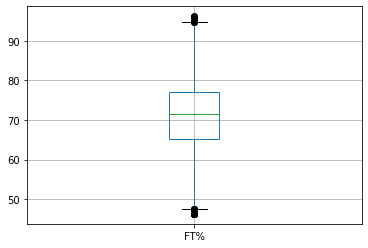

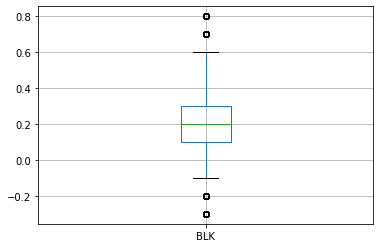

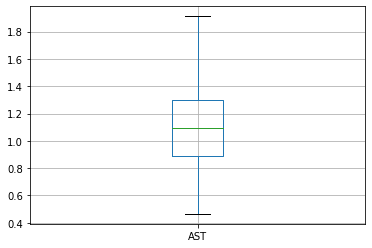

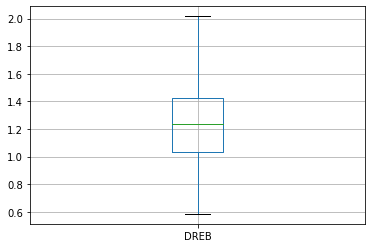

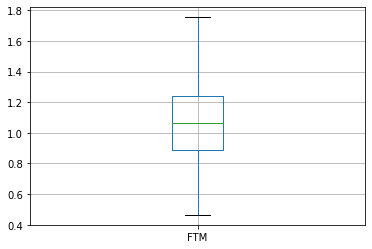

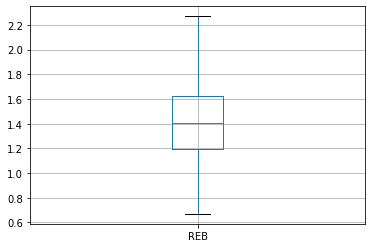

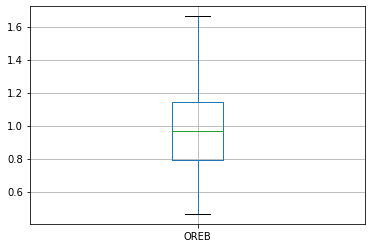

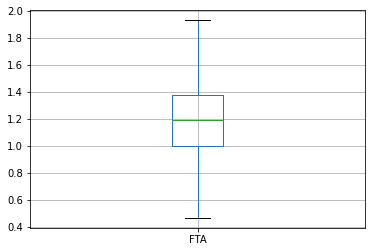

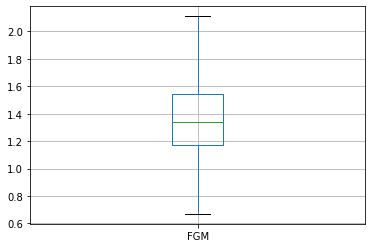

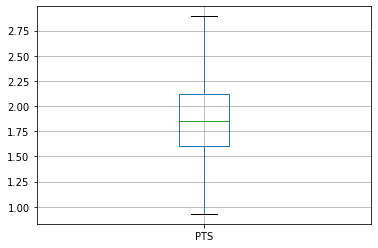

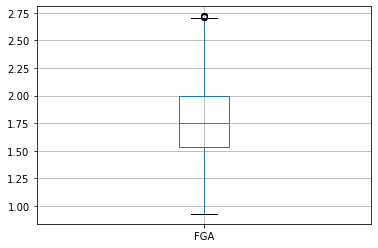

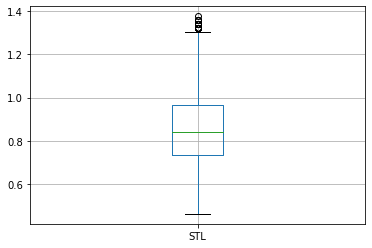

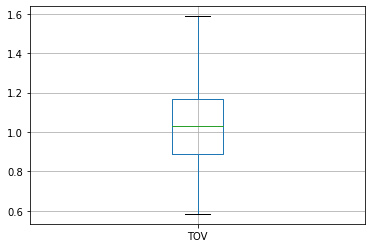

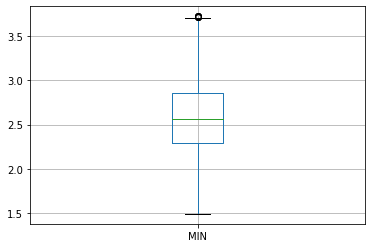

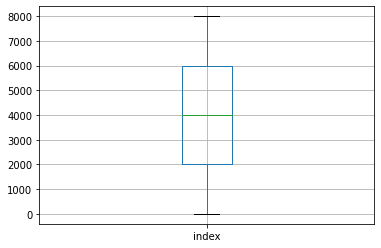

In [461]:
for column in df_train_norm:
    plt.figure()
    df_train_norm.boxplot([column])

In [471]:
## Replace the target into the DF
df_train_norm_outlier = df_train_norm.join(df_train_tgt_index['TARGET_5Yrs'])
df_train_norm_outlier.head()
df_train_norm_outlier.drop(['index'], axis = 1, inplace = True)
df_train_norm_outlier.head()

,GP,FG%,3P Made,3PA,3P%,FT%,BLK,AST,DREB,FTM,REB,OREB,FTA,FGM,PTS,FGA,STL,TOV,MIN,TARGET_5Yrs
Id,,,,,,,,,,,,,,,,,,,,
10556,80,45.7,0.1,0.3,22.6,72.1,0.2,1.473613,1.259921,1.259921,1.560491,1.300591,1.426043,1.442250,1.983192,1.856636,1.032280,1.169607,2.896468,1
5342,75,55.1,-0.3,-1.0,34.9,67.8,0.6,0.887904,1.546680,1.338866,1.875777,1.532619,1.532619,1.613429,2.189760,1.991632,0.793701,1.118689,2.793522,1
5716,85,42.8,0.4,1.2,34.3,75.7,0.2,0.928318,1.216440,0.736806,1.338866,0.843433,0.843433,1.238562,1.650964,1.650964,0.736806,0.843433,2.673075,1
13790,63,52.5,0.3,0.8,23.7,66.9,0.1,1.216440,1.259921,0.965489,1.442250,0.928318,1.144714,1.518294,2.016530,1.885204,0.736806,1.238562,2.673075,1
5470,63,50.8,0.5,1.4,13.7,54.0,0.6,0.736806,1.392477,0.584804,1.698499,1.338866,0.793701,1.193483,1.546680,1.503695,0.736806,0.887904,2.610999,1


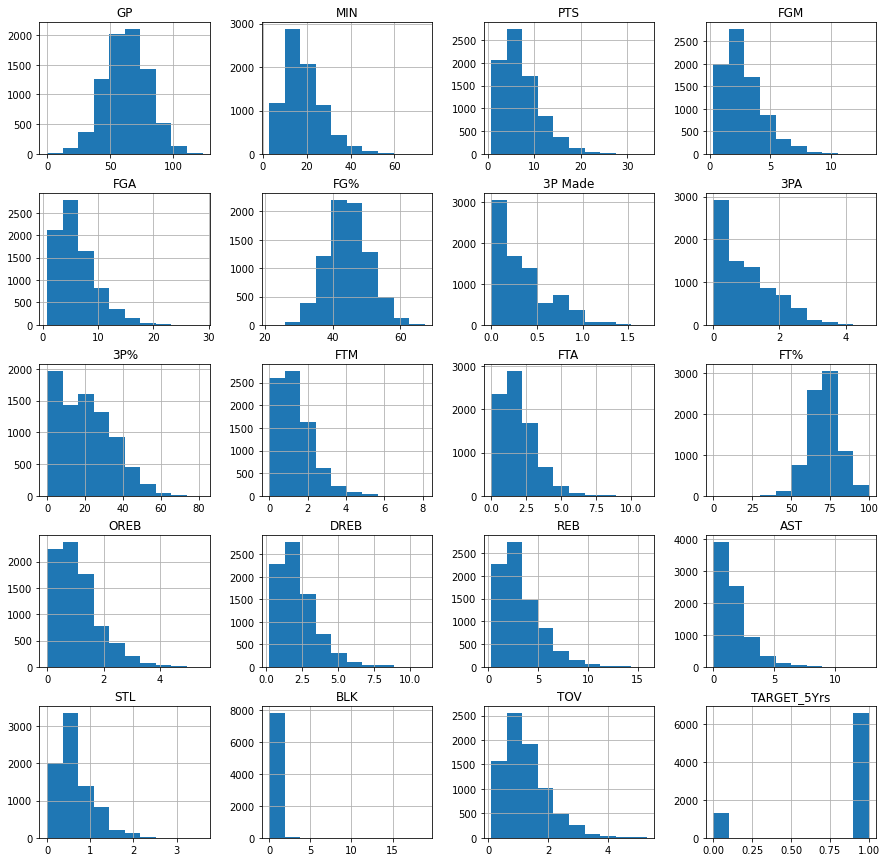

In [8]:
df_train.hist(figsize=[15,15])
plt.show()

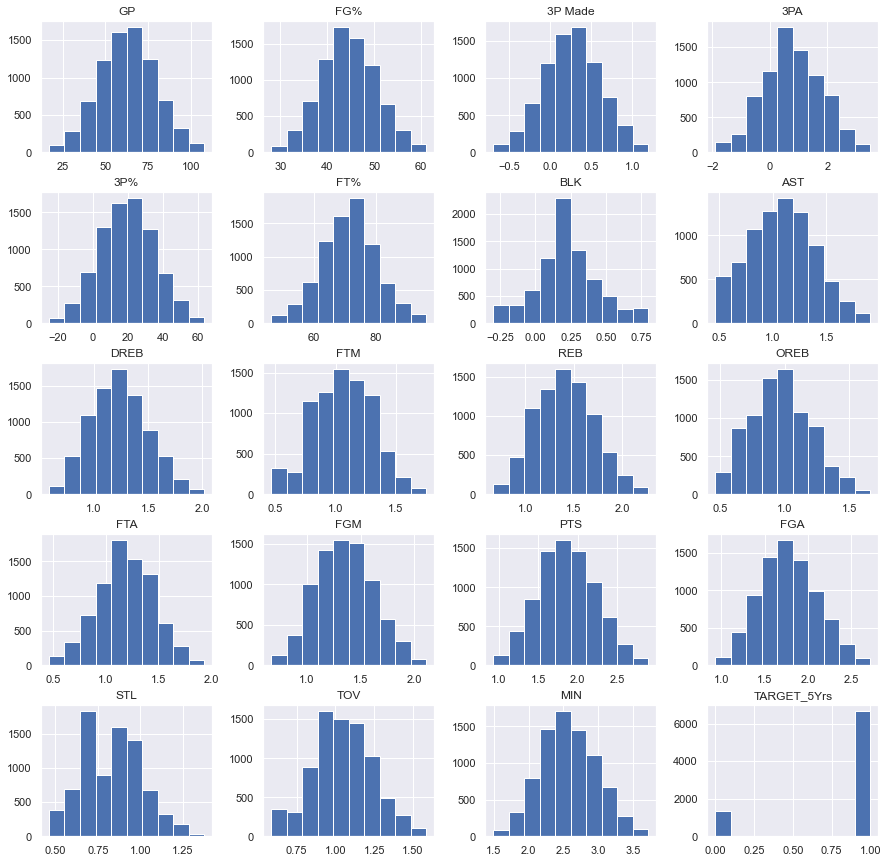

In [472]:
## Compare the original train data with the normalised with outliers set to the median value 
df_train_norm_outlier.hist(figsize=[15,15])
plt.show()

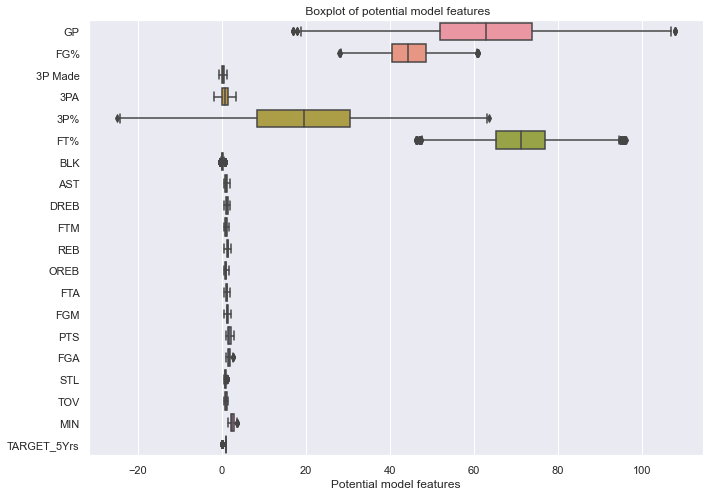

In [474]:
## Updated boxplot on the cleaned df
sns.set(rc={'figure.figsize':(11,8)})
sns.boxplot(data = df_train_norm_outlier, orient = 'h')
plt.xlabel('Potential model features')
plt.title(' Boxplot of potential model features')
plt.savefig('/Users/james/projects/adsi/group1_nba_career_prediction/reports/figures/box_plot.png')

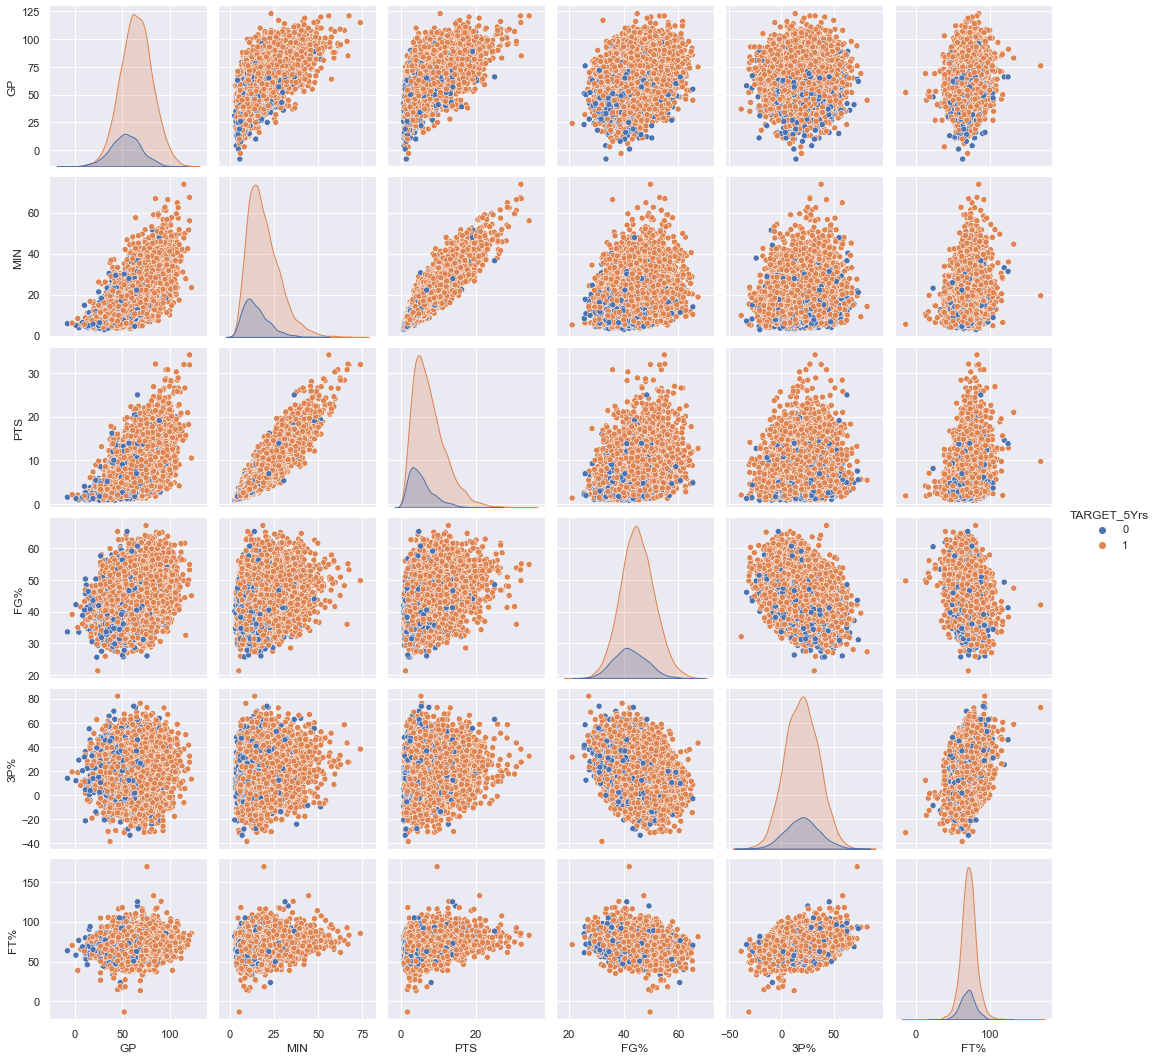

In [475]:
## Original training DF for comparison 
selected_features = df_train[["GP", "MIN", "PTS", "FG%", "TARGET_5Yrs", "3P%", "FT%"]]
selected_features
sns.pairplot(selected_features, hue = "TARGET_5Yrs")
plt.savefig('/Users/james/projects/adsi/group1_nba_career_prediction/reports/figures/pair_plot.png')

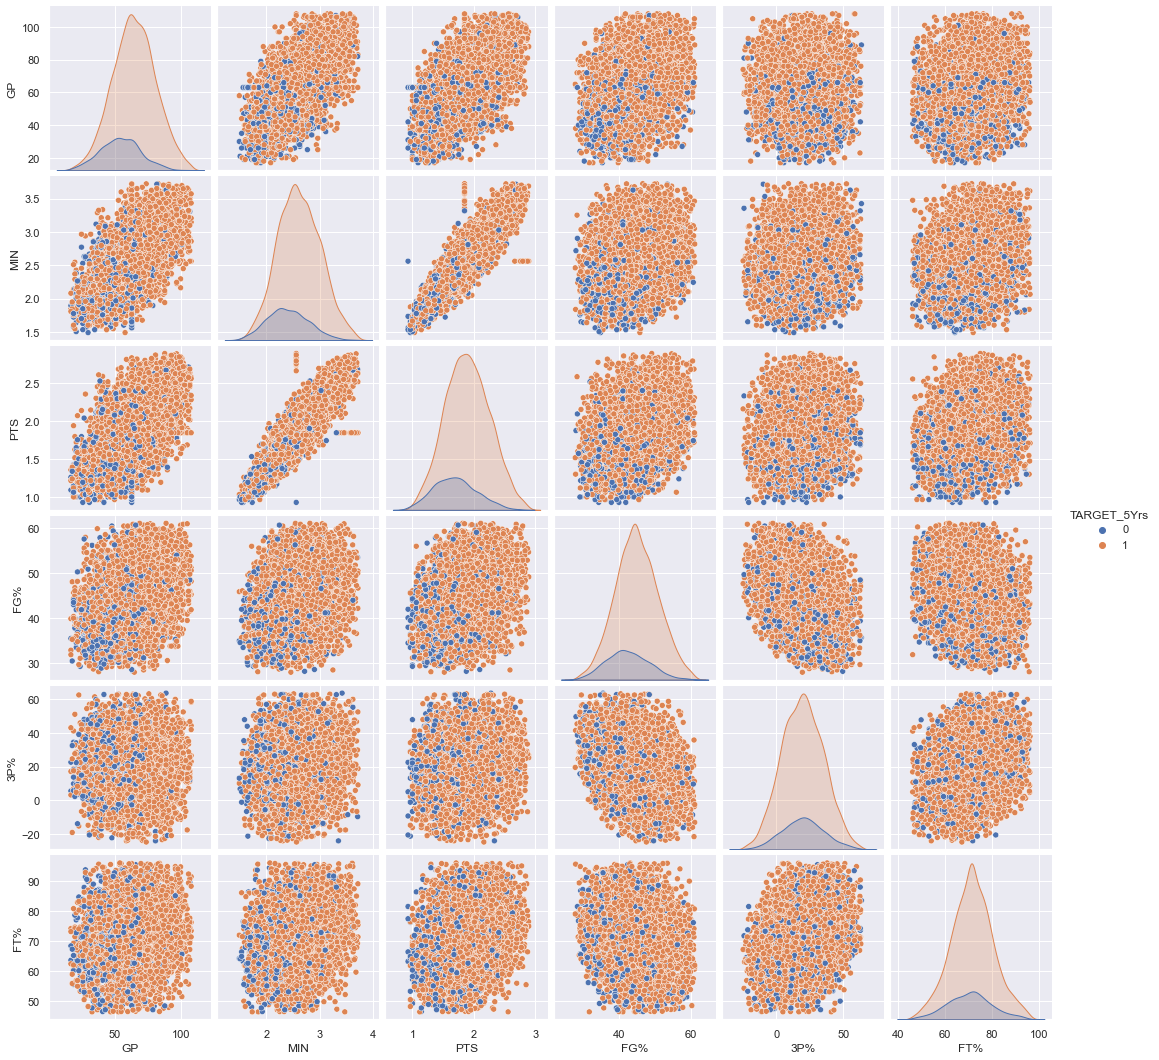

In [478]:
selected_features_clean = df_train_norm_outlier[["GP", "MIN", "PTS", "FG%", "TARGET_5Yrs", "3P%", "FT%"]]
sns.pairplot(selected_features_clean, hue = "TARGET_5Yrs")
plt.savefig('/Users/james/projects/adsi/group1_nba_career_prediction/reports/figures/pair_plot_clean.png')

<AxesSubplot:>

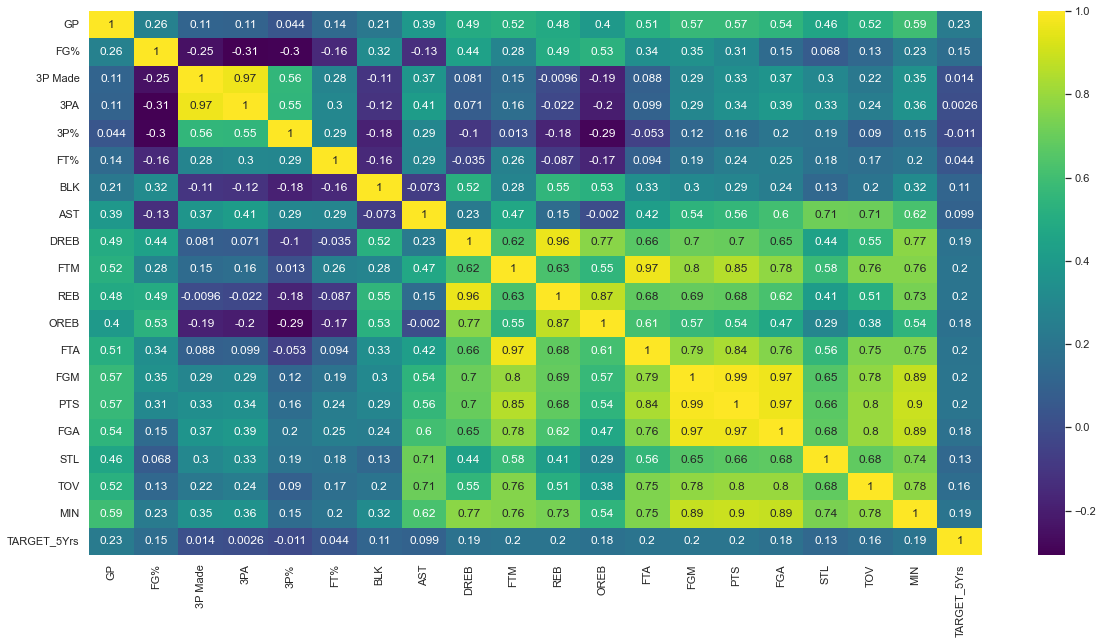

In [551]:
## Check for correlation between values to inform parameter selection for modelling
plt.figure(figsize=(20,10))
sns.heatmap(df_train_norm_outlier.corr(),cmap='viridis',annot=True)

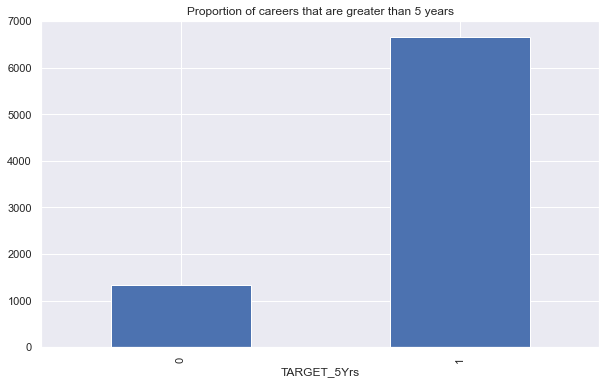

In [479]:
GroupedData=df_train_norm_outlier.groupby('TARGET_5Yrs').size()
GroupedData.plot(kind='bar', figsize=(10,6))
plt.title('Proportion of careers that are greater than 5 years')
plt.savefig('/Users/james/projects/adsi/group1_nba_career_prediction/reports/figures/balanced_data.png')

There appears to be an imbalanced data set between the classes in the target variable. In order to reduce the effects of the model a weight will have to be applied to this to balance out the differences. Oversampling will be performed using SMOTE. 

In [480]:
df_train_norm_outlier.columns

Index(['GP', 'FG%', '3P Made', '3PA', '3P%', 'FT%', 'BLK', 'AST', 'DREB',
       'FTM', 'REB', 'OREB', 'FTA', 'FGM', 'PTS', 'FGA', 'STL', 'TOV', 'MIN',
       'TARGET_5Yrs'],
      dtype='object')

## Build an initial model

In [552]:
## Separate the target variable from the rest of the variables
TargetVariable = df_train_norm_outlier['TARGET_5Yrs']
print(TargetVariable)
Predictors = df_train.loc[:, ['GP', 'FG%', '3P Made', '3PA', '3P%', 'FT%', 'BLK', 'AST', 'DREB','FTM', 'REB', 'OREB', 'FTA', 'FGM', 'PTS', 'FGA', 'STL', 'TOV', 'MIN']]
print(Predictors)
X = Predictors.values
y = TargetVariable.values
print(X)
print(y)

Id
10556    1
5342     1
5716     1
13790    1
5470     1
        ..
2996     1
11679    1
5537     1
1292     1
2900     1
Name: TARGET_5Yrs, Length: 8000, dtype: int64
       GP   FG%  3P Made  3PA   3P%   FT%  BLK  AST  DREB  FTM  REB  OREB  \
Id                                                                          
10556  80  45.7      0.1  0.3  22.6  72.1  0.2  3.2   2.0  2.0  3.8   2.2   
5342   75  55.1     -0.3 -1.0  34.9  67.8  0.6  0.7   3.7  2.4  6.6   3.6   
5716   85  42.8      0.4  1.2  34.3  75.7  0.2  0.8   1.8  0.4  2.4   0.6   
13790  63  52.5      0.3  0.8  23.7  66.9  0.1  1.8   2.0  0.9  3.0   0.8   
5470   63  50.8      0.5  1.4  13.7  54.0  0.6  0.4   2.7  0.2  4.9   2.4   
...    ..   ...      ...  ...   ...   ...  ...  ...   ...  ...  ...   ...   
2996   32  40.3     -0.1 -0.2  23.1  65.7  0.2  0.5   1.8  0.4  1.9   0.3   
11679  54  48.7      0.1  0.1   3.1  70.1  0.3  0.1   1.1  0.2  2.0   1.0   
5537   85  45.1      0.2  0.6  23.6  69.7  0.2  3.4   2.1  2

In [553]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [554]:
## Impletement a SMOTE 
print('Before oversamplining:', Counter(y_train))

Before oversamplining: Counter({1: 5000, 0: 1000})


In [557]:
# define oversampling strategy
SMOTE = SMOTE()
SMOTE

TypeError: 'SMOTE' object is not callable

In [558]:
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

In [559]:
print("After oversampling: ",Counter(y_train_SMOTE))

After oversampling:  Counter({1: 5000, 0: 5000})


In [641]:
## Build the model
from xgboost import XGBClassifier

clf=XGBClassifier(max_depth=3, 
                  learning_rate=0.01,
                  nfold=10, 
                  n_estimators=1000, 
                  subsample = .9,
                  reg_alpha = .3,
                  gamma = 10,
                  colsample_bytree = 1,
                  objective='binary:logistic', 
                  booster='gbtree')
print(clf)

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=1,
              enable_categorical=False, gamma=10, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=3,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, nfold=10, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=0.3, reg_lambda=None,
              scale_pos_weight=None, subsample=0.9, tree_method=None,
              validate_parameters=None, verbosity=None)


In [642]:
## Create a model on the train data
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","error"]


%time XGB=clf.fit(X_train_SMOTE, y_train_SMOTE, eval_set = eval_set, eval_metric = eval_metric, verbose = True)
XGB

## prediction on test data
prediction = XGB.predict(X_test)
prediction

[00:12:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "nfold" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.66727	validation_0-error:0.41233	validation_1-auc:0.61916	validation_1-error:0.42200
[1]	validation_0-auc:0.66727	validation_0-error:0.41233	validation_1-auc:0.61916	validation_1-error:0.42200
[2]	validation_0-auc:0.66815	validation_0-error:0.39750	validation_1-auc:0.61999	validation_1-error:0.40900
[3]	validation_0-auc:0.67517	validation_0-error:0.34550	validation_1-auc:0.62084	validation_1-error:0.37450
[4]	validation_0-auc:0.67613	validation_0-error:0.39033	validation_1-auc:0.62145	validation_1-error:0.40100
[5]	validation_0-auc:0.67482	validation_0-error:0.39750	validation_1-auc

/Users/james/projects/adsi/adsi/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[30]	validation_0-auc:0.69345	validation_0-error:0.34450	validation_1-auc:0.63735	validation_1-error:0.37400
[31]	validation_0-auc:0.69581	validation_0-error:0.34383	validation_1-auc:0.64074	validation_1-error:0.37400
[32]	validation_0-auc:0.69626	validation_0-error:0.34383	validation_1-auc:0.64043	validation_1-error:0.37400
[33]	validation_0-auc:0.69648	validation_0-error:0.34383	validation_1-auc:0.64058	validation_1-error:0.37400
[34]	validation_0-auc:0.69683	validation_0-error:0.34383	validation_1-auc:0.64118	validation_1-error:0.37400
[35]	validation_0-auc:0.69882	validation_0-error:0.34417	validation_1-auc:0.64315	validation_1-error:0.37250
[36]	validation_0-auc:0.69906	validation_0-error:0.34350	validation_1-auc:0.64371	validation_1-error:0.37300
[37]	validation_0-auc:0.69934	validation_0-error:0.34367	validation_1-auc:0.64393	validation_1-error:0.37350
[38]	validation_0-auc:0.69986	validation_0-error:0.34367	validation_1-auc:0.64465	validation_1-error:0.37350
[39]	validation_0-a

[106]	validation_0-auc:0.71453	validation_0-error:0.30700	validation_1-auc:0.67050	validation_1-error:0.31550
[107]	validation_0-auc:0.71465	validation_0-error:0.30733	validation_1-auc:0.67071	validation_1-error:0.31500
[108]	validation_0-auc:0.71469	validation_0-error:0.30750	validation_1-auc:0.67097	validation_1-error:0.31700
[109]	validation_0-auc:0.71495	validation_0-error:0.30767	validation_1-auc:0.67132	validation_1-error:0.31750
[110]	validation_0-auc:0.71508	validation_0-error:0.30767	validation_1-auc:0.67182	validation_1-error:0.31600
[111]	validation_0-auc:0.71493	validation_0-error:0.30567	validation_1-auc:0.67168	validation_1-error:0.31650
[112]	validation_0-auc:0.71493	validation_0-error:0.30567	validation_1-auc:0.67198	validation_1-error:0.31650
[113]	validation_0-auc:0.71478	validation_0-error:0.30233	validation_1-auc:0.67186	validation_1-error:0.31800
[114]	validation_0-auc:0.71487	validation_0-error:0.30233	validation_1-auc:0.67222	validation_1-error:0.31650
[115]	vali

[181]	validation_0-auc:0.71940	validation_0-error:0.27717	validation_1-auc:0.67568	validation_1-error:0.29550
[182]	validation_0-auc:0.71944	validation_0-error:0.27683	validation_1-auc:0.67565	validation_1-error:0.29550
[183]	validation_0-auc:0.71950	validation_0-error:0.27700	validation_1-auc:0.67561	validation_1-error:0.29500
[184]	validation_0-auc:0.71954	validation_0-error:0.27617	validation_1-auc:0.67581	validation_1-error:0.29350
[185]	validation_0-auc:0.71962	validation_0-error:0.27600	validation_1-auc:0.67605	validation_1-error:0.29150
[186]	validation_0-auc:0.71964	validation_0-error:0.27600	validation_1-auc:0.67626	validation_1-error:0.29150
[187]	validation_0-auc:0.71984	validation_0-error:0.27517	validation_1-auc:0.67629	validation_1-error:0.29100
[188]	validation_0-auc:0.71991	validation_0-error:0.27567	validation_1-auc:0.67627	validation_1-error:0.29150
[189]	validation_0-auc:0.72007	validation_0-error:0.27533	validation_1-auc:0.67631	validation_1-error:0.29050
[190]	vali

[256]	validation_0-auc:0.72262	validation_0-error:0.25767	validation_1-auc:0.67662	validation_1-error:0.27450
[257]	validation_0-auc:0.72264	validation_0-error:0.25750	validation_1-auc:0.67654	validation_1-error:0.27400
[258]	validation_0-auc:0.72270	validation_0-error:0.25733	validation_1-auc:0.67660	validation_1-error:0.27400
[259]	validation_0-auc:0.72280	validation_0-error:0.25750	validation_1-auc:0.67663	validation_1-error:0.27350
[260]	validation_0-auc:0.72266	validation_0-error:0.25767	validation_1-auc:0.67659	validation_1-error:0.27450
[261]	validation_0-auc:0.72280	validation_0-error:0.25750	validation_1-auc:0.67662	validation_1-error:0.27400
[262]	validation_0-auc:0.72286	validation_0-error:0.25767	validation_1-auc:0.67671	validation_1-error:0.27400
[263]	validation_0-auc:0.72291	validation_0-error:0.25750	validation_1-auc:0.67661	validation_1-error:0.27400
[264]	validation_0-auc:0.72286	validation_0-error:0.25767	validation_1-auc:0.67655	validation_1-error:0.27400
[265]	vali

[331]	validation_0-auc:0.72489	validation_0-error:0.25067	validation_1-auc:0.67563	validation_1-error:0.27000
[332]	validation_0-auc:0.72481	validation_0-error:0.25067	validation_1-auc:0.67558	validation_1-error:0.27000
[333]	validation_0-auc:0.72488	validation_0-error:0.25083	validation_1-auc:0.67559	validation_1-error:0.27000
[334]	validation_0-auc:0.72490	validation_0-error:0.25100	validation_1-auc:0.67558	validation_1-error:0.26950
[335]	validation_0-auc:0.72491	validation_0-error:0.25100	validation_1-auc:0.67544	validation_1-error:0.26950
[336]	validation_0-auc:0.72490	validation_0-error:0.25133	validation_1-auc:0.67537	validation_1-error:0.26950
[337]	validation_0-auc:0.72490	validation_0-error:0.25150	validation_1-auc:0.67535	validation_1-error:0.26950
[338]	validation_0-auc:0.72496	validation_0-error:0.25083	validation_1-auc:0.67530	validation_1-error:0.26950
[339]	validation_0-auc:0.72490	validation_0-error:0.25117	validation_1-auc:0.67526	validation_1-error:0.26950
[340]	vali

[406]	validation_0-auc:0.72615	validation_0-error:0.24333	validation_1-auc:0.67187	validation_1-error:0.26350
[407]	validation_0-auc:0.72610	validation_0-error:0.24300	validation_1-auc:0.67175	validation_1-error:0.26250
[408]	validation_0-auc:0.72612	validation_0-error:0.24283	validation_1-auc:0.67176	validation_1-error:0.26250
[409]	validation_0-auc:0.72619	validation_0-error:0.24267	validation_1-auc:0.67182	validation_1-error:0.26300
[410]	validation_0-auc:0.72615	validation_0-error:0.24283	validation_1-auc:0.67170	validation_1-error:0.26400
[411]	validation_0-auc:0.72622	validation_0-error:0.24333	validation_1-auc:0.67178	validation_1-error:0.26300
[412]	validation_0-auc:0.72631	validation_0-error:0.24267	validation_1-auc:0.67187	validation_1-error:0.26350
[413]	validation_0-auc:0.72623	validation_0-error:0.24283	validation_1-auc:0.67163	validation_1-error:0.26300
[414]	validation_0-auc:0.72623	validation_0-error:0.24333	validation_1-auc:0.67148	validation_1-error:0.26300
[415]	vali

[481]	validation_0-auc:0.72813	validation_0-error:0.23467	validation_1-auc:0.66952	validation_1-error:0.24950
[482]	validation_0-auc:0.72808	validation_0-error:0.23483	validation_1-auc:0.66947	validation_1-error:0.24950
[483]	validation_0-auc:0.72809	validation_0-error:0.23483	validation_1-auc:0.66940	validation_1-error:0.24900
[484]	validation_0-auc:0.72806	validation_0-error:0.23500	validation_1-auc:0.66927	validation_1-error:0.24850
[485]	validation_0-auc:0.72809	validation_0-error:0.23517	validation_1-auc:0.66944	validation_1-error:0.24750
[486]	validation_0-auc:0.72804	validation_0-error:0.23533	validation_1-auc:0.66931	validation_1-error:0.24750
[487]	validation_0-auc:0.72810	validation_0-error:0.23500	validation_1-auc:0.66922	validation_1-error:0.24750
[488]	validation_0-auc:0.72813	validation_0-error:0.23467	validation_1-auc:0.66913	validation_1-error:0.24700
[489]	validation_0-auc:0.72832	validation_0-error:0.23483	validation_1-auc:0.66914	validation_1-error:0.24700
[490]	vali

[556]	validation_0-auc:0.72942	validation_0-error:0.22417	validation_1-auc:0.66897	validation_1-error:0.23300
[557]	validation_0-auc:0.72949	validation_0-error:0.22333	validation_1-auc:0.66902	validation_1-error:0.23300
[558]	validation_0-auc:0.72950	validation_0-error:0.22317	validation_1-auc:0.66904	validation_1-error:0.23300
[559]	validation_0-auc:0.72956	validation_0-error:0.22250	validation_1-auc:0.66917	validation_1-error:0.23150
[560]	validation_0-auc:0.72958	validation_0-error:0.22267	validation_1-auc:0.66918	validation_1-error:0.23150
[561]	validation_0-auc:0.72955	validation_0-error:0.22283	validation_1-auc:0.66911	validation_1-error:0.23150
[562]	validation_0-auc:0.72952	validation_0-error:0.22283	validation_1-auc:0.66904	validation_1-error:0.23150
[563]	validation_0-auc:0.72957	validation_0-error:0.22250	validation_1-auc:0.66897	validation_1-error:0.23150
[564]	validation_0-auc:0.72969	validation_0-error:0.22217	validation_1-auc:0.66904	validation_1-error:0.23150
[565]	vali

[631]	validation_0-auc:0.73064	validation_0-error:0.21500	validation_1-auc:0.66722	validation_1-error:0.22600
[632]	validation_0-auc:0.73066	validation_0-error:0.21450	validation_1-auc:0.66724	validation_1-error:0.22650
[633]	validation_0-auc:0.73073	validation_0-error:0.21433	validation_1-auc:0.66725	validation_1-error:0.22600
[634]	validation_0-auc:0.73065	validation_0-error:0.21433	validation_1-auc:0.66719	validation_1-error:0.22600
[635]	validation_0-auc:0.73073	validation_0-error:0.21450	validation_1-auc:0.66718	validation_1-error:0.22550
[636]	validation_0-auc:0.73081	validation_0-error:0.21417	validation_1-auc:0.66726	validation_1-error:0.22550
[637]	validation_0-auc:0.73082	validation_0-error:0.21417	validation_1-auc:0.66737	validation_1-error:0.22500
[638]	validation_0-auc:0.73089	validation_0-error:0.21383	validation_1-auc:0.66731	validation_1-error:0.22500
[639]	validation_0-auc:0.73092	validation_0-error:0.21383	validation_1-auc:0.66726	validation_1-error:0.22500
[640]	vali

[706]	validation_0-auc:0.73208	validation_0-error:0.20367	validation_1-auc:0.66768	validation_1-error:0.21950
[707]	validation_0-auc:0.73210	validation_0-error:0.20383	validation_1-auc:0.66771	validation_1-error:0.21950
[708]	validation_0-auc:0.73219	validation_0-error:0.20350	validation_1-auc:0.66755	validation_1-error:0.21900
[709]	validation_0-auc:0.73221	validation_0-error:0.20317	validation_1-auc:0.66753	validation_1-error:0.21900
[710]	validation_0-auc:0.73216	validation_0-error:0.20317	validation_1-auc:0.66742	validation_1-error:0.21900
[711]	validation_0-auc:0.73218	validation_0-error:0.20333	validation_1-auc:0.66739	validation_1-error:0.21900
[712]	validation_0-auc:0.73220	validation_0-error:0.20317	validation_1-auc:0.66739	validation_1-error:0.21900
[713]	validation_0-auc:0.73224	validation_0-error:0.20317	validation_1-auc:0.66738	validation_1-error:0.21900
[714]	validation_0-auc:0.73230	validation_0-error:0.20317	validation_1-auc:0.66742	validation_1-error:0.21900
[715]	vali

[781]	validation_0-auc:0.73425	validation_0-error:0.19633	validation_1-auc:0.66814	validation_1-error:0.21400
[782]	validation_0-auc:0.73435	validation_0-error:0.19650	validation_1-auc:0.66819	validation_1-error:0.21500
[783]	validation_0-auc:0.73436	validation_0-error:0.19667	validation_1-auc:0.66839	validation_1-error:0.21350
[784]	validation_0-auc:0.73438	validation_0-error:0.19717	validation_1-auc:0.66847	validation_1-error:0.21400
[785]	validation_0-auc:0.73439	validation_0-error:0.19700	validation_1-auc:0.66845	validation_1-error:0.21400
[786]	validation_0-auc:0.73435	validation_0-error:0.19683	validation_1-auc:0.66840	validation_1-error:0.21400
[787]	validation_0-auc:0.73442	validation_0-error:0.19683	validation_1-auc:0.66840	validation_1-error:0.21400
[788]	validation_0-auc:0.73438	validation_0-error:0.19683	validation_1-auc:0.66832	validation_1-error:0.21400
[789]	validation_0-auc:0.73437	validation_0-error:0.19667	validation_1-auc:0.66827	validation_1-error:0.21400
[790]	vali

[856]	validation_0-auc:0.73662	validation_0-error:0.18900	validation_1-auc:0.66799	validation_1-error:0.20750
[857]	validation_0-auc:0.73664	validation_0-error:0.18850	validation_1-auc:0.66804	validation_1-error:0.20650
[858]	validation_0-auc:0.73669	validation_0-error:0.18833	validation_1-auc:0.66797	validation_1-error:0.20650
[859]	validation_0-auc:0.73675	validation_0-error:0.18833	validation_1-auc:0.66806	validation_1-error:0.20600
[860]	validation_0-auc:0.73673	validation_0-error:0.18833	validation_1-auc:0.66800	validation_1-error:0.20600
[861]	validation_0-auc:0.73676	validation_0-error:0.18767	validation_1-auc:0.66796	validation_1-error:0.20550
[862]	validation_0-auc:0.73679	validation_0-error:0.18750	validation_1-auc:0.66799	validation_1-error:0.20500
[863]	validation_0-auc:0.73682	validation_0-error:0.18767	validation_1-auc:0.66795	validation_1-error:0.20550
[864]	validation_0-auc:0.73686	validation_0-error:0.18750	validation_1-auc:0.66801	validation_1-error:0.20550
[865]	vali

[931]	validation_0-auc:0.73926	validation_0-error:0.18133	validation_1-auc:0.66759	validation_1-error:0.19450
[932]	validation_0-auc:0.73934	validation_0-error:0.18133	validation_1-auc:0.66772	validation_1-error:0.19450
[933]	validation_0-auc:0.73938	validation_0-error:0.18133	validation_1-auc:0.66768	validation_1-error:0.19500
[934]	validation_0-auc:0.73944	validation_0-error:0.18133	validation_1-auc:0.66767	validation_1-error:0.19500
[935]	validation_0-auc:0.73939	validation_0-error:0.18133	validation_1-auc:0.66756	validation_1-error:0.19500
[936]	validation_0-auc:0.73939	validation_0-error:0.18133	validation_1-auc:0.66756	validation_1-error:0.19500
[937]	validation_0-auc:0.73946	validation_0-error:0.18133	validation_1-auc:0.66758	validation_1-error:0.19550
[938]	validation_0-auc:0.73945	validation_0-error:0.18117	validation_1-auc:0.66758	validation_1-error:0.19500
[939]	validation_0-auc:0.73949	validation_0-error:0.18100	validation_1-auc:0.66759	validation_1-error:0.19500
[940]	vali

array([0, 1, 1, ..., 1, 1, 1])

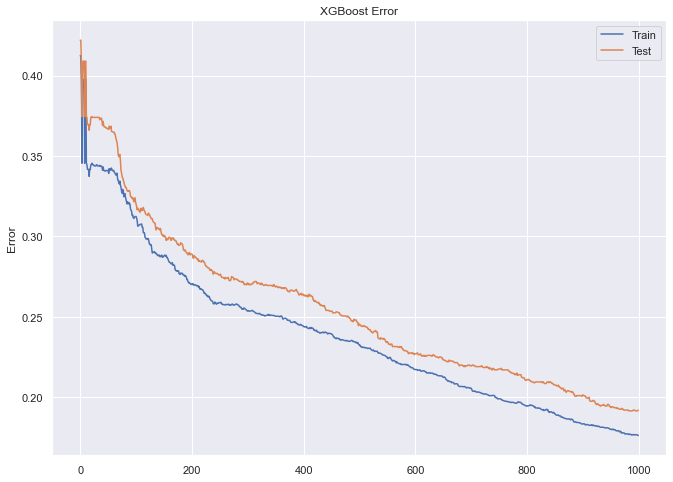

In [643]:
results = XGB.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Error')
plt.title('XGBoost Error')
plt.savefig('/Users/james/projects/adsi/group1_nba_career_prediction/reports/figures/train_test_error.png')

In [644]:
XGB

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=10, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8, nfold=10,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [645]:
## Measure accuracy of prediction
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.36      0.21      0.27       331
           1       0.86      0.93      0.89      1669

    accuracy                           0.81      2000
   macro avg       0.61      0.57      0.58      2000
weighted avg       0.77      0.81      0.79      2000



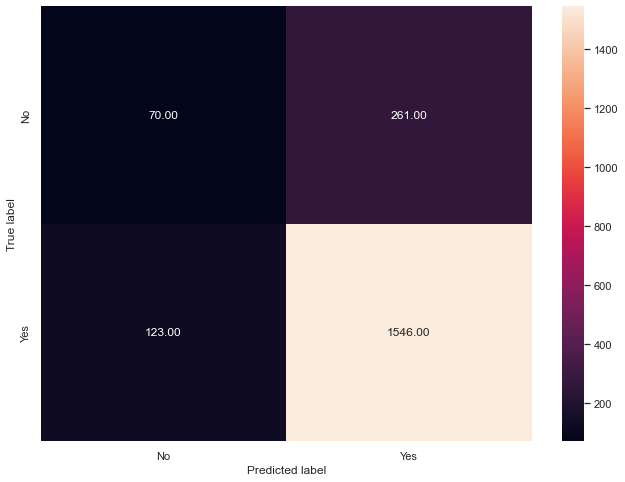

In [646]:
cm = metrics.confusion_matrix(y_test, prediction)

sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)
plt.savefig('/Users/james/projects/adsi/group1_nba_career_prediction/reports/figures/confusion_matrix_clean.png')

In [647]:
Predictors.reset_index(drop=True)

,GP,FG%,3P Made,3PA,3P%,FT%,BLK,AST,DREB,FTM,REB,OREB,FTA,FGM,PTS,FGA,STL,TOV,MIN
0,80,45.7,0.1,0.3,22.6,72.1,0.2,3.2,2.0,2.0,3.8,2.2,2.9,3.0,7.8,6.4,1.1,1.6,24.3
1,75,55.1,-0.3,-1.0,34.9,67.8,0.6,0.7,3.7,2.4,6.6,3.6,3.6,4.2,10.5,7.9,0.5,1.4,21.8
2,85,42.8,0.4,1.2,34.3,75.7,0.2,0.8,1.8,0.4,2.4,0.6,0.6,1.9,4.5,4.5,0.4,0.6,19.1
3,63,52.5,0.3,0.8,23.7,66.9,0.1,1.8,2.0,0.9,3.0,0.8,1.5,3.5,8.2,6.7,0.4,1.9,19.1
4,63,50.8,0.5,1.4,13.7,54.0,0.6,0.4,2.7,0.2,4.9,2.4,0.5,1.7,3.7,3.4,0.4,0.7,17.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,32,40.3,-0.1,-0.2,23.1,65.7,0.2,0.5,1.8,0.4,1.9,0.3,0.6,0.7,1.8,1.8,0.3,0.4,9.2
7996,54,48.7,0.1,0.1,3.1,70.1,0.3,0.1,1.1,0.2,2.0,1.0,0.4,0.7,1.8,1.4,0.0,0.3,6.0
7997,85,45.1,0.2,0.6,23.6,69.7,0.2,3.4,2.1,2.8,3.1,1.0,3.9,4.0,10.7,9.0,1.2,1.8,28.2
7998,39,40.1,-0.3,-0.5,13.3,74.3,0.3,0.2,0.6,0.6,0.9,0.4,0.7,1.0,2.5,2.3,0.3,0.5,7.7


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

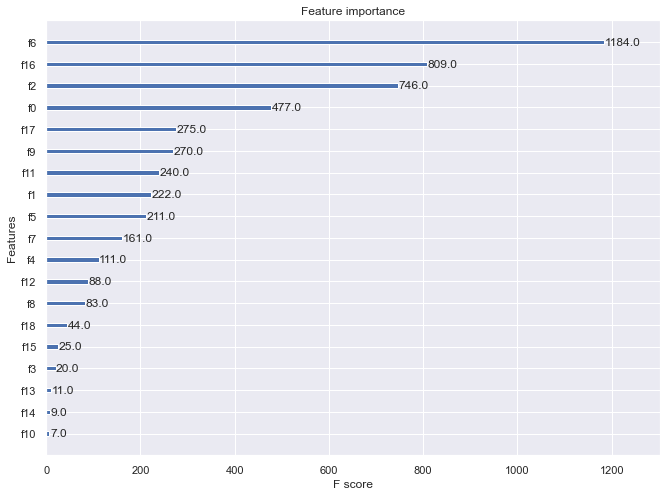

In [648]:
plot_importance(XGB)

<BarContainer object of 19 artists>

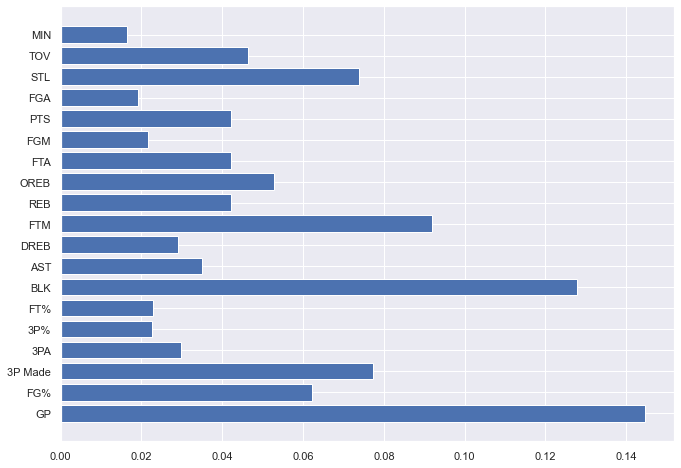

In [649]:
## Plot feature importance 
XGB.feature_importances_
plt.barh(Predictors.reset_index(drop=True).columns, XGB.feature_importances_)

In [650]:
X_test
Predictors = Predictors.reset_index(drop=True)
Predictors.columns

Index(['GP', 'FG%', '3P Made', '3PA', '3P%', 'FT%', 'BLK', 'AST', 'DREB',
       'FTM', 'REB', 'OREB', 'FTA', 'FGM', 'PTS', 'FGA', 'STL', 'TOV', 'MIN'],
      dtype='object')

In [651]:
results = pd.DataFrame(data = X_test, columns = Predictors.columns)
results['Target'] = y_test
results['Prediction'] = prediction
results['Target'].unique()

array([1, 0])

In [652]:
## Load and pre-process test data
df_test

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,1,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,8194,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,-0.0,1.8
2,3,82,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,8196,86,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,8197,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,8175,84,21.2,8.7,3.4,6.7,50.2,0.0,-0.0,-4.5,1.7,2.5,68.1,1.9,2.3,3.9,1.5,0.6,0.3,2.0
3795,8176,49,16.3,6.4,2.9,6.6,44.4,-0.1,-0.4,19.8,1.0,1.9,50.2,1.7,2.8,4.4,0.4,0.4,0.4,0.7
3796,8178,53,9.9,2.1,0.8,1.8,43.1,-0.4,-0.6,1.9,0.6,1.0,63.9,0.7,1.0,1.7,0.4,0.4,0.2,0.5
3797,8181,89,38.3,14.5,5.4,11.8,45.2,0.5,1.2,24.7,2.5,2.9,89.2,1.5,4.0,5.5,3.7,1.3,0.3,2.4


In [653]:
## Apply a cube root transformation to columns that have high skew values, this will normalise the data and handle negative values
skew = df_test[['AST', 'DREB', 'FTM', 'REB', 'OREB', 'FTA', 'FGM', 'PTS', 'FGA', 'STL', 'TOV', 'MIN']]
skew
df_test_norm = df_test.drop(skew, axis = 1)
df_test_norm #keep normallly distributed values in a separate df

,Id,GP,FG%,3P Made,3PA,3P%,FT%,BLK
0,1,56,43.7,0.1,0.3,7.3,63.4,0.3
1,8194,43,46.0,0.6,1.7,35.1,75.3,-0.0
2,3,82,45.6,0.5,1.9,44.8,71.2,0.3
3,8196,86,42.9,0.5,1.8,13.5,70.9,0.1
4,8197,58,40.0,0.5,1.7,38.7,76.9,-0.4
...,...,...,...,...,...,...,...,...
3794,8175,84,50.2,0.0,-0.0,-4.5,68.1,0.3
3795,8176,49,44.4,-0.1,-0.4,19.8,50.2,0.4
3796,8178,53,43.1,-0.4,-0.6,1.9,63.9,0.2
3797,8181,89,45.2,0.5,1.2,24.7,89.2,0.3


In [625]:
## Apply a cube root transformation as part of the cleaning process
df_test_skew = skew.apply(lambda x:np.cbrt(x))

In [626]:
## Combine normal and skew dfs - the df now has no skewed values in the features - The target value will be handled later using SMOTE
df_test_norm = df_test_norm.join(df_test_skew)
df_test_norm.skew()

Id        -0.033237
GP         0.004918
FG%        0.184888
3P Made   -0.035731
3PA       -0.040984
3P%       -0.017761
FT%        0.104416
BLK        6.641694
AST       -0.105167
DREB       0.240452
FTM       -0.027417
REB        0.249151
OREB      -0.184424
FTA        0.006500
FGM        0.270305
PTS        0.240783
FGA        0.291634
STL       -0.273864
TOV        0.110116
MIN        0.239315
dtype: float64

In [627]:
## Create an index to use with the identification of the outliers
df_test_norm['index'] = np.arange(len(df_test_norm))
df_test_norm

,Id,GP,FG%,3P Made,3PA,3P%,FT%,BLK,AST,DREB,...,REB,OREB,FTA,FGM,PTS,FGA,STL,TOV,MIN,index
0,1,56,43.7,0.1,0.3,7.3,63.4,0.3,0.736806,0.928318,...,1.193483,1.062659,1.062659,1.169607,1.587401,1.546680,0.584804,0.928318,2.087759,0
1,8194,43,46.0,0.6,1.7,35.1,75.3,-0.0,1.518294,0.965489,...,1.144714,0.793701,1.357209,1.546680,2.161592,2.008299,0.843433,1.216440,2.682373,1
2,3,82,45.6,0.5,1.9,44.8,71.2,0.3,1.357209,1.488806,...,1.650964,1.091393,1.392477,1.698499,2.244017,2.196689,1.091393,1.259921,3.236433,2
3,8196,86,42.9,0.5,1.8,13.5,70.9,0.1,1.600521,1.473613,...,1.709976,1.144714,1.846915,1.894536,2.659006,2.514581,0.965489,1.532619,3.548971,3
4,8197,58,40.0,0.5,1.7,38.7,76.9,-0.4,1.144714,0.843433,...,0.965489,0.584804,1.091393,1.169607,1.675069,1.587401,0.793701,0.965489,2.308350,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,8175,84,50.2,0.0,-0.0,-4.5,68.1,0.3,1.144714,1.320006,...,1.574061,1.238562,1.357209,1.503695,2.056710,1.885204,0.843433,1.259921,2.767655,3794
3795,8176,49,44.4,-0.1,-0.4,19.8,50.2,0.4,0.736806,1.409460,...,1.638643,1.193483,1.238562,1.426043,1.856636,1.875777,0.736806,0.887904,2.535494,3795
3796,8178,53,43.1,-0.4,-0.6,1.9,63.9,0.2,0.736806,1.000000,...,1.193483,0.887904,1.000000,0.928318,1.280579,1.216440,0.736806,0.793701,2.147229,3796
3797,8181,89,45.2,0.5,1.2,24.7,89.2,0.3,1.546680,1.587401,...,1.765174,1.144714,1.426043,1.754411,2.438499,2.276638,1.091393,1.338866,3.370800,3797


In [628]:
#outlier
counter = 0
for column in df_test_norm:
    probable_outliers_tm, possible_outliers_tm, inner_fence_le, inner_fence_ue = fn.tukeys_method(df_test_norm, column)
    print("The number of probable outliers in ", column, 'are: ',len(probable_outliers_tm), '\n', probable_outliers_tm) ## only probable outliers need to be treated
    print("The number of possible outliers in ", column, 'are: ',len(possible_outliers_tm), '\n', possible_outliers_tm)
    med_column = df_test_norm[column].median()
    print("The median value is :", round(med_column, 4))
    print("The expected range is: ",inner_fence_le, " - ", inner_fence_ue)
    for i in df_test_norm['index']:
        for j in possible_outliers_tm:
            if i == j: # compare the indexes for both the original location and the IQR ranges 
                print(column, df_test_norm[column].iloc[i])
                df_test_norm[column].iloc[i] = med_column
                print(med_column)

The number of probable outliers in  Id are:  0 
 []
The number of possible outliers in  Id are:  0 
 []
The median value is : 7062.0
The expected range is:  -6493.75  -  20540.25
The number of probable outliers in  GP are:  0 
 []
The number of possible outliers in  GP are:  26 
 [298, 756, 1306, 1324, 1347, 1417, 1772, 2102, 2270, 2288, 2372, 2396, 2421, 2966, 3010, 3072, 3177, 3330, 3356, 3473, 3506, 3627, 3630, 3637, 3685, 3724]
The median value is : 63.0
The expected range is:  16.5  -  108.5
GP 112
63.0
GP 113
63.0
GP 16
63.0
GP 111
63.0
GP 118
63.0
GP 14
63.0
GP 118
63.0
GP 110
63.0
GP 15
63.0
GP 112
63.0
GP 116
63.0
GP 14
63.0
GP 109
63.0
GP 112
63.0
GP 13
63.0
GP 112
63.0
GP 112
63.0
GP 126
63.0
GP 10
63.0
GP 9
63.0
GP 14
63.0
GP 12
63.0
GP 16
63.0
GP 113


/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1108408505.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_norm[column].iloc[i] = med_column


63.0
GP 6
63.0
GP 11
63.0
The number of probable outliers in  FG% are:  1 
 [1854]
The number of possible outliers in  FG% are:  33 
 [5, 21, 27, 53, 106, 181, 278, 374, 502, 577, 629, 684, 790, 927, 1073, 1125, 1430, 1482, 1854, 1871, 1888, 2292, 2615, 2634, 2813, 2930, 2931, 2976, 3236, 3321, 3374, 3404, 3597]
The median value is : 44.6
The expected range is:  28.5  -  60.5
FG% 62.0
44.6
FG% 62.3
44.6
FG% 60.9
44.6
FG% 28.2
44.6
FG% 62.7
44.6
FG% 66.2
44.6
FG% 62.0
44.6
FG% 62.7
44.6
FG% 60.7
44.6
FG% 61.2
44.6
FG% 63.4
44.6
FG% 66.6
44.6
FG% 60.9
44.6
FG% 25.6
44.6
FG% 61.0
44.6
FG% 60.7
44.6
FG% 28.1
44.6
FG% 25.9
44.6
FG% 74.6
44.6
FG% 65.3
44.6
FG% 25.1
44.6
FG% 63.7
44.6
FG% 61.0
44.6
FG% 62.3
44.6
FG% 67.7


/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1108408505.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_norm[column].iloc[i] = med_column


44.6
FG% 63.0
44.6
FG% 64.4
44.6
FG% 27.8
44.6
FG% 65.3
44.6
FG% 61.0
44.6
FG% 60.5
44.6
FG% 26.5
44.6
FG% 62.5
44.6
The number of probable outliers in  3P Made are:  0 
 []
The number of possible outliers in  3P Made are:  37 
 [165, 188, 229, 421, 609, 615, 616, 884, 1050, 1051, 1073, 1155, 1181, 1252, 1289, 1351, 1436, 1472, 1508, 1534, 1676, 1683, 1807, 1830, 1868, 2395, 2649, 2677, 2799, 3076, 3145, 3220, 3238, 3383, 3553, 3715, 3754]
The median value is : 0.3
The expected range is:  -0.75  -  1.25
3P Made 1.3
0.3
3P Made 1.4
0.3
3P Made 1.3
0.3
3P Made -0.9
0.3
3P Made 1.4
0.3
3P Made -0.8
0.3
3P Made 1.5
0.3
3P Made -0.8
0.3
3P Made -0.8
0.3
3P Made 1.3
0.3
3P Made -0.8
0.3
3P Made 1.4
0.3
3P Made 1.4
0.3
3P Made 1.5
0.3
3P Made 1.4
0.3
3P Made 1.3
0.3
3P Made 1.3
0.3
3P Made 1.3


/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1108408505.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_norm[column].iloc[i] = med_column


0.3
3P Made -0.8
0.3
3P Made -0.9
0.3
3P Made -0.9
0.3
3P Made -0.8
0.3
3P Made 1.3
0.3
3P Made 1.4
0.3
3P Made 1.6
0.3
3P Made -0.8
0.3
3P Made -0.8
0.3
3P Made -0.8
0.3
3P Made -0.9
0.3
3P Made 1.4
0.3
3P Made 1.3
0.3
3P Made -0.9
0.3
3P Made -0.8
0.3
3P Made -0.8
0.3
3P Made -0.8
0.3
3P Made 1.3
0.3
3P Made -1.0
0.3
The number of probable outliers in  3PA are:  0 
 []
The number of possible outliers in  3PA are:  37 
 [118, 165, 229, 421, 492, 609, 616, 884, 1050, 1051, 1072, 1073, 1115, 1155, 1178, 1181, 1252, 1289, 1351, 1356, 1436, 1508, 1534, 1676, 1683, 1807, 1830, 1868, 2649, 2799, 3076, 3220, 3383, 3715, 3751, 3754, 3757]
The median value is : 0.8
The expected range is:  -1.9999999999999996  -  3.5999999999999996
3PA 3.7
0.8
3PA 3.8
0.8
3PA 4.2
0.8
3PA -2.5
0.8
3PA -2.1
0.8
3PA 4.2
0.8
3PA 3.9


/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1108408505.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_norm[column].iloc[i] = med_column


0.8
3PA -2.3
0.8
3PA -2.2
0.8
3PA 3.7
0.8
3PA -2.0
0.8
3PA -2.5
0.8
3PA -2.0
0.8
3PA 3.9
0.8
3PA 3.7
0.8
3PA 3.7
0.8
3PA 4.3
0.8
3PA 3.8
0.8
3PA 3.6
0.8
3PA -2.2
0.8
3PA 3.7
0.8
3PA -2.1
0.8
3PA -2.4
0.8
3PA -2.2
0.8
3PA -2.3
0.8
3PA 3.8
0.8
3PA 4.1
0.8
3PA 4.3
0.8
3PA -2.2
0.8
3PA -2.6
0.8
3PA 3.6
0.8
3PA -2.5
0.8
3PA -2.3
0.8
3PA 3.7
0.8
3PA -2.1
0.8
3PA -2.7
0.8
3PA 3.6
0.8
The number of probable outliers in  3P% are:  0 
 []
The number of possible outliers in  3P% are:  17 
 [165, 204, 342, 349, 651, 699, 1115, 1523, 1868, 2046, 2181, 2219, 2269, 2298, 2332, 2593, 3513]
The median value is : 19.4
The expected range is:  -24.125  -  62.875
3P% 64.3
19.4
3P% -30.7
19.4
3P% -38.0
19.4
3P% -34.5
19.4
3P% 69.0
19.4
3P% -24.5
19.4
3P% -29.6
19.4
3P% 73.8
19.4
3P% 71.2
19.4
3P% -26.1
19.4
3P% 68.1
19.4
3P% -25.7
19.4
3P% -27.5
19.4
3P% -30.1
19.4
3P% 72.0


/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1108408505.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_norm[column].iloc[i] = med_column
/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1108408505.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_norm[column].iloc[i] = med_column


19.4
3P% 69.8
19.4
3P% -26.5
19.4
The number of probable outliers in  FT% are:  3 
 [1744, 2198, 3720]
The number of possible outliers in  FT% are:  86 
 [116, 165, 214, 229, 243, 367, 388, 437, 482, 491, 524, 545, 628, 770, 834, 860, 866, 977, 992, 1016, 1115, 1141, 1162, 1181, 1261, 1334, 1340, 1366, 1374, 1423, 1430, 1437, 1592, 1676, 1677, 1744, 1867, 1969, 1993, 2033, 2072, 2073, 2100, 2102, 2104, 2132, 2140, 2141, 2166, 2198, 2317, 2328, 2332, 2354, 2356, 2392, 2429, 2463, 2475, 2507, 2546, 2555, 2635, 2639, 2684, 2707, 2721, 2795, 2916, 2926, 2979, 2993, 3000, 3220, 3229, 3265, 3286, 3381, 3384, 3437, 3490, 3600, 3628, 3647, 3720, 3741]
The median value is : 71.5
The expected range is:  45.5  -  97.5
FT% 44.2
71.5
FT% 110.8
71.5
FT% 102.5
71.5
FT% 105.7
71.5
FT% 37.7
71.5
FT% 98.0
71.5
FT% 43.5
71.5
FT% 34.7
71.5
FT% 110.2
71.5
FT% 100.6
71.5
FT% 44.9
71.5
FT% 31.7
71.5
FT% 104.6
71.5
FT% 100.9
71.5
FT% 105.4
71.5
FT% 40.2
71.5
FT% 44.8
71.5
FT% 102.9
71.5
FT% 41.7
71.5
FT% 41.8

/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1108408505.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_norm[column].iloc[i] = med_column


0.2
BLK -0.4
0.2
BLK 1.0
0.2
BLK -0.6
0.2
BLK 0.9
0.2
BLK -0.5
0.2
BLK -0.4
0.2
BLK -0.9
0.2
BLK -1.9
0.2
BLK 2.9
0.2
BLK -0.4
0.2
BLK -0.4
0.2
BLK -1.8
0.2
BLK -0.4
0.2
BLK 2.0
0.2
BLK -0.9
0.2
BLK -1.0
0.2
BLK 2.1
0.2
BLK -0.8
0.2
BLK -0.5
0.2
BLK 2.9
0.2
BLK -1.2
0.2
BLK 2.4
0.2
BLK 3.0
0.2
BLK 3.0
0.2
BLK 1.7
0.2
BLK -0.5
0.2
BLK 1.2
0.2
BLK -0.8
0.2
BLK -0.5
0.2
BLK 1.4
0.2
BLK 1.1
0.2
BLK -0.5
0.2
BLK -2.3
0.2
BLK -0.5
0.2
BLK -1.2
0.2
BLK -0.7
0.2
BLK 1.0
0.2
BLK 1.1
0.2
BLK -0.9
0.2
BLK 1.3
0.2
BLK -0.4
0.2
BLK 0.9
0.2
BLK 1.3
0.2
BLK 1.2
0.2
BLK 1.3
0.2
BLK 1.5
0.2
BLK 1.2
0.2
BLK 1.4
0.2
BLK 1.3
0.2
BLK 1.7
0.2
BLK 1.0
0.2
BLK -0.5
0.2
BLK -1.1
0.2
BLK -0.5
0.2
BLK 1.2
0.2
BLK -0.4
0.2
BLK -0.7
0.2
BLK 2.7
0.2
BLK 2.1
0.2
BLK 1.0
0.2
BLK 1.2
0.2
BLK -1.1
0.2
BLK 1.5
0.2
BLK 1.5
0.2
BLK -0.5
0.2
BLK 1.0
0.2
BLK 1.4
0.2
BLK -0.6
0.2
BLK -0.5
0.2
BLK 1.4
0.2
BLK 1.3
0.2
BLK -1.2
0.2
BLK 1.7
0.2
BLK -0.5
0.2
BLK -1.0
0.2
BLK 1.6
0.2
BLK 1.3
0.2
BLK -0.7
0.2
BLK 1.0
0.2
BLK 0.9
0.

/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1108408505.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_norm[column].iloc[i] = med_column


1.091392883061106
AST 0.0
1.091392883061106
AST 0.0
1.091392883061106
AST 0.0
1.091392883061106
AST 0.0
1.091392883061106
AST 0.0
1.091392883061106
AST 0.0
1.091392883061106
AST 2.080083823051904
1.091392883061106
AST 0.0
1.091392883061106
AST 0.0
1.091392883061106
AST 0.0
1.091392883061106
AST 0.0
1.091392883061106
AST 0.0
1.091392883061106
AST 0.0
1.091392883061106
AST 0.0
1.091392883061106
AST 0.0
1.091392883061106
AST 0.0
1.091392883061106
AST 2.0645602309127344
1.091392883061106
AST 0.0
1.091392883061106
AST 0.0
1.091392883061106
AST 0.0
1.091392883061106
The number of probable outliers in  DREB are:  0 
 []
The number of possible outliers in  DREB are:  17 
 [122, 965, 1084, 1268, 1331, 1472, 2129, 2292, 2337, 2448, 2521, 2865, 3265, 3330, 3586, 3744, 3762]
The median value is : 1.2386
The expected range is:  0.5175817022429149  -  1.9711200140821048
DREB 2.072351098059261
1.2385623296301709
DREB 2.0165296752181043
1.2385623296301709
DREB 2.0246938520054574
1.2385623296301709
DRE

/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1108408505.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_norm[column].iloc[i] = med_column
/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1108408505.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_norm[column].iloc[i] = med_column


1.2385623296301709
DREB 2.0
1.2385623296301709
DREB 2.0246938520054574
1.2385623296301709
DREB 1.9746808222123668
1.2385623296301709
DREB 1.9746808222123668
1.2385623296301709
DREB 2.1472291690189413
1.2385623296301709
DREB 2.0082988502465087
1.2385623296301709
DREB 2.0567101162059633
1.2385623296301709
DREB 1.9746808222123668
1.2385623296301709
DREB 2.2894284851066637
1.2385623296301709
DREB 2.139974961130159
1.2385623296301709
DREB 2.0082988502465087
1.2385623296301709
DREB 2.087759478663449
1.2385623296301709
The number of probable outliers in  FTM are:  0 
 []
The number of possible outliers in  FTM are:  12 
 [295, 520, 1397, 1443, 1468, 1487, 1772, 2448, 3330, 3422, 3487, 3661]
The median value is : 1.0627
The expected range is:  0.3619165099112456  -  1.764549821461526
FTM 0.0
1.0626585691826111
FTM 1.7863159877080566
1.0626585691826111
FTM 1.7651741676630315
1.0626585691826111
FTM 0.0
1.0626585691826111
FTM 0.0
1.0626585691826111
FTM 1.7863159877080566
1.0626585691826111
FTM 1.

/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1108408505.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_norm[column].iloc[i] = med_column


1.4094597464129783
REB 2.3269667714505617
1.4094597464129783
REB 2.250617114677132
1.4094597464129783
REB 2.283051213952527
1.4094597464129783
REB 2.2440170265918304
1.4094597464129783
REB 2.308350239753609
1.4094597464129783
REB 2.2637023919259014
1.4094597464129783
REB 2.386966383854674
1.4094597464129783
REB 2.270188680649385
1.4094597464129783
REB 2.2637023919259014
1.4094597464129783
REB 2.3573483576137275
1.4094597464129783
REB 2.2571787177370006
1.4094597464129783
REB 2.2440170265918304
1.4094597464129783
REB 2.398610306579842
1.4094597464129783
REB 2.3269667714505617
1.4094597464129783
REB 2.2571787177370006
1.4094597464129783
REB 2.283051213952527
1.4094597464129783
REB 2.283051213952527
1.4094597464129783
REB 2.339214190570293
1.4094597464129783
REB 2.3633315009350024
1.4094597464129783
REB 2.644786236347104
1.4094597464129783
REB 2.2440170265918304
1.4094597464129783
REB 2.41014226417523
1.4094597464129783
REB 2.2637023919259014
1.4094597464129783
REB 2.302077517963147
1.409

/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1108408505.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_norm[column].iloc[i] = med_column


0.9654893846056298
OREB 1.7324782106818055
0.9654893846056298
OREB 1.6750686836022342
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 1.6868653306034984
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 1.6984992522418108
0.9654893846056298
OREB -0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 1.6984992522418108
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 1.7435134012651283
0.9654893846056298
OREB 1.6750686836022342
0.9654893846056298
OREB 0.0
0.9654893846056298
OREB 1.6984992522418108
0.9654893846056298
OREB 1.7435134012651283
0.9654893846056298
OREB 

/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1108408505.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_norm[column].iloc[i] = med_column
/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1108408505.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_norm[column].iloc[i] = med_column
/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1108408505.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

1.8566355334451117
PTS 3.029341715272494
1.8566355334451117
PTS 3.110681157514638
1.8566355334451117
PTS 2.9738467389284104
1.8566355334451117
PTS 2.9738467389284104
1.8566355334451117
PTS 3.110681157514638
1.8566355334451117
PTS 3.16817410531767
1.8566355334451117
PTS 3.089873302932822
1.8566355334451117
PTS 3.0473954294010075
1.8566355334451117
PTS 3.100312143386684
1.8566355334451117
PTS 3.2075343299958265
1.8566355334451117
PTS 2.924017738212866
1.8566355334451117
PTS 2.916199471653423
1.8566355334451117
PTS 2.908339057595449
1.8566355334451117
PTS 2.8683842840342444
1.8566355334451117
PTS 2.8724299653959897
1.8566355334451117
The number of probable outliers in  FGA are:  0 
 []
The number of possible outliers in  FGA are:  19 
 [15, 253, 415, 520, 977, 1080, 1084, 1472, 1772, 1781, 1915, 2448, 2521, 2673, 3330, 3369, 3422, 3757, 3762]
The median value is : 1.7652
The expected range is:  0.8542526590603254  -  2.7007265649582184
FGA 2.750137734148282
1.7651741676630315
FGA 2.771999

/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1108408505.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_norm[column].iloc[i] = med_column
/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1108408505.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_norm[column].iloc[i] = med_column


1.7651741676630315
FGA 2.7977873676275316
1.7651741676630315
FGA 2.892489483762225
1.7651741676630315
FGA 2.970072817692642
1.7651741676630315
FGA 2.7098860261703273
1.7651741676630315
FGA 2.75453796202665
1.7651741676630315
FGA 2.7676550072889183
1.7651741676630315
FGA 2.7053392289952405
1.7651741676630315
The number of probable outliers in  STL are:  18 
 [41, 264, 791, 909, 982, 1116, 1443, 1468, 1777, 2039, 2169, 2313, 2396, 2611, 3040, 3156, 3229, 3661]
The number of possible outliers in  STL are:  38 
 [41, 158, 264, 299, 321, 457, 546, 791, 909, 982, 1080, 1084, 1116, 1210, 1436, 1443, 1468, 1518, 1578, 1772, 1777, 1915, 2039, 2103, 2127, 2169, 2313, 2362, 2396, 2519, 2611, 2912, 3040, 3156, 3229, 3636, 3661, 3757]
The median value is : 0.8434
The expected range is:  0.39378167241174855  -  1.3085140119219587
STL 0.0
0.8434326653017492
STL 1.3200061217959125
0.8434326653017492
STL 0.0
0.8434326653017492
STL 1.3200061217959125
0.8434326653017492
STL 1.338865900164339
0.8434326653

/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1108408505.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_norm[column].iloc[i] = med_column
/var/folders/yj/2lgxpksx41q5nh3s545dtc2w0000gn/T/ipykernel_2252/1108408505.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_norm[column].iloc[i] = med_column


1.0322801154563672
TOV 0.4641588833612779
1.0322801154563672
TOV 1.6005206638831553
1.0322801154563672
TOV 0.4641588833612779
1.0322801154563672
TOV 0.4641588833612779
1.0322801154563672
TOV 0.4641588833612779
1.0322801154563672
TOV 1.7324782106818055
1.0322801154563672
TOV 1.721300620726316
1.0322801154563672
TOV 0.4641588833612779
1.0322801154563672
TOV 0.4641588833612779
1.0322801154563672
TOV 0.4641588833612779
1.0322801154563672
The number of probable outliers in  MIN are:  0 
 []
The number of possible outliers in  MIN are:  13 
 [520, 640, 1084, 1472, 1772, 2012, 2448, 2521, 2918, 3330, 3422, 3752, 3762]
The median value is : 2.5713
The expected range is:  1.4709264262094344  -  3.6873293375526686
MIN 3.7844237748122436
2.571281590658235
MIN 3.7229159701276915
2.571281590658235
MIN 4.016597700493017
2.571281590658235
MIN 4.033059350436209
2.571281590658235
MIN 4.081655101917348
2.571281590658235
MIN 3.8326820989897006
2.571281590658235
MIN 3.884178726754907
2.571281590658235
MIN

In [629]:
df_test_norm
df_test_norm_outlier = df_test_norm

In [630]:
df_test_norm_outlier.drop(['index'], axis = 1, inplace = True)
df_test_norm_outlier.head()

,Id,GP,FG%,3P Made,3PA,3P%,FT%,BLK,AST,DREB,FTM,REB,OREB,FTA,FGM,PTS,FGA,STL,TOV,MIN
0,1,56,43.7,0.1,0.3,7.3,63.4,0.3,0.736806,0.928318,0.887904,1.193483,1.062659,1.062659,1.169607,1.587401,1.546680,0.584804,0.928318,2.087759
1,8194,43,46.0,0.6,1.7,35.1,75.3,-0.0,1.518294,0.965489,1.216440,1.144714,0.793701,1.357209,1.546680,2.161592,2.008299,0.843433,1.216440,2.682373
2,3,82,45.6,0.5,1.9,44.8,71.2,0.3,1.357209,1.488806,1.216440,1.650964,1.091393,1.392477,1.698499,2.244017,2.196689,1.091393,1.259921,3.236433
3,8196,86,42.9,0.5,1.8,13.5,70.9,0.1,1.600521,1.473613,1.650964,1.709976,1.144714,1.846915,1.894536,2.659006,2.514581,0.965489,1.532619,3.548971
4,8197,58,40.0,0.5,1.7,38.7,76.9,0.2,1.144714,0.843433,1.032280,0.965489,0.584804,1.091393,1.169607,1.675069,1.587401,0.793701,0.965489,2.308350


In [631]:
## Load test data 
pred_cols = Predictors.columns
pred_cols
df_test_pred = df_test[pred_cols]
df_test_pred

,GP,FG%,3P Made,3PA,3P%,FT%,BLK,AST,DREB,FTM,REB,OREB,FTA,FGM,PTS,FGA,STL,TOV,MIN
0,56,43.7,0.1,0.3,7.3,63.4,0.3,0.4,0.8,0.7,1.7,1.2,1.2,1.6,4.0,3.7,0.2,0.8,9.1
1,43,46.0,0.6,1.7,35.1,75.3,-0.0,3.5,0.9,1.8,1.5,0.5,2.5,3.7,10.1,8.1,0.6,1.8,19.3
2,82,45.6,0.5,1.9,44.8,71.2,0.3,2.5,3.3,1.8,4.5,1.3,2.7,4.9,11.3,10.6,1.3,2.0,33.9
3,86,42.9,0.5,1.8,13.5,70.9,0.1,4.1,3.2,4.5,5.0,1.5,6.3,6.8,18.8,15.9,0.9,3.6,44.7
4,58,40.0,0.5,1.7,38.7,76.9,-0.4,1.5,0.6,1.1,0.9,0.2,1.3,1.6,4.7,4.0,0.5,0.9,12.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,84,50.2,0.0,-0.0,-4.5,68.1,0.3,1.5,2.3,1.7,3.9,1.9,2.5,3.4,8.7,6.7,0.6,2.0,21.2
3795,49,44.4,-0.1,-0.4,19.8,50.2,0.4,0.4,2.8,1.0,4.4,1.7,1.9,2.9,6.4,6.6,0.4,0.7,16.3
3796,53,43.1,-0.4,-0.6,1.9,63.9,0.2,0.4,1.0,0.6,1.7,0.7,1.0,0.8,2.1,1.8,0.4,0.5,9.9
3797,89,45.2,0.5,1.2,24.7,89.2,0.3,3.7,4.0,2.5,5.5,1.5,2.9,5.4,14.5,11.8,1.3,2.4,38.3


In [632]:
test_pred = pd.DataFrame(XGB.predict_proba(df_test_pred))
test_pred_df = pd.DataFrame(test_pred[1])
test_pred_df.columns = ['TARGET_5Yrs']
test_pred_df

/Users/james/projects/adsi/adsi/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


,TARGET_5Yrs
0,0.679375
1,0.637118
2,0.813581
3,0.917063
4,0.596284
...,...
3794,0.821813
3795,0.779398
3796,0.635947
3797,0.893732


In [633]:
Id = pd.DataFrame(df_test['Id'])
Id

,Id
0,1
1,8194
2,3
3,8196
4,8197
...,...
3794,8175
3795,8176
3796,8178
3797,8181


In [634]:
submission = Id.join(test_pred_df)
submission.to_csv('/Users/james/projects/adsi/group1_nba_career_prediction/models/model_2_1.csv', index = False)